In [1]:
import zipfile
import os

zip_path = r"F:\Thessis\data-set\Aptos_1.zip"
extract_path = r"F:\Thessis\data-set"

# আনজিপ
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted to:", extract_path)


Extracted to: F:\Thessis\data-set


In [2]:
import os, glob
import pandas as pd

# CSV লোড
csv_path = r"F:\Thessis\data-set\Aptos_1\Retinopathy_info\Retinopathy_info.csv"
df = pd.read_csv(csv_path)

print(df.head())
print(df.info())


        id_code  diagnosis
0  1ae8c165fd53          2
1  1b329a127307          1
2  1b32e1d775ea          4
3  1b3647865779          0
4  1b398c0494d1          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    3662 non-null   object
 1   diagnosis  3662 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.3+ KB
None


In [3]:
# dataset ফোল্ডার (যেখানে ইমেজ আনজিপ করেছো)
extract_path = r"F:\Thessis\data-set\Aptos_1\Retinopathy_images"

# valid image extensions
img_exts = {'.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff'}

# সব ইমেজ path খুঁজে বের করা (subfolder সহ)
all_files = glob.glob(os.path.join(extract_path, "**", "*.*"), recursive=True)
image_files = [f for f in all_files if os.path.splitext(f)[1].lower() in img_exts]

print(f"Total image files found: {len(image_files)}")
print("Example:", image_files[:5])


Total image files found: 3662
Example: ['F:\\Thessis\\data-set\\Aptos_1\\Retinopathy_images\\000c1434d8d7.png', 'F:\\Thessis\\data-set\\Aptos_1\\Retinopathy_images\\001639a390f0.png', 'F:\\Thessis\\data-set\\Aptos_1\\Retinopathy_images\\0024cdab0c1e.png', 'F:\\Thessis\\data-set\\Aptos_1\\Retinopathy_images\\002c21358ce6.png', 'F:\\Thessis\\data-set\\Aptos_1\\Retinopathy_images\\005b95c28852.png']


In [4]:
# Detect the ID column
possible_id_cols = ['id_code', 'image', 'filename', 'file_name', 'image_id', 'id']
id_col = next((c for c in possible_id_cols if c in df.columns), None)
if id_col is None:
    raise ValueError(f"Couldn't find an ID column in CSV. Columns: {list(df.columns)}")
print("Using ID column:", id_col)


# Normalize functions
def norm_csv_id(x):
    x = str(x).strip()
    x = os.path.basename(x)             # remove any folder path
    x = os.path.splitext(x)[0]          # remove extension
    return x.lower()

def norm_file_basename(p):
    return os.path.splitext(os.path.basename(p))[0].lower()

# Apply normalization
df['id_norm'] = df[id_col].map(norm_csv_id)
basename_to_path = {norm_file_basename(p): p for p in image_files}

# Map to image paths
df['image_path'] = df['id_norm'].map(basename_to_path)
df = df[df['image_path'].notna()].reset_index(drop=True)

print(f"✅ After cleaning: {len(df)} images remain")

Using ID column: id_code
✅ After cleaning: 3648 images remain


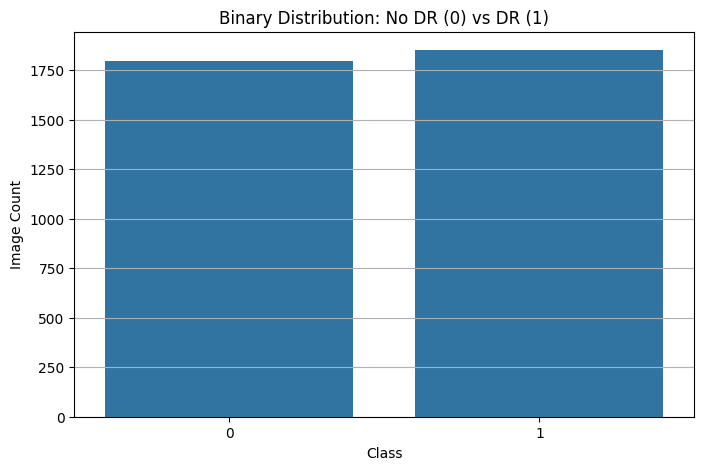

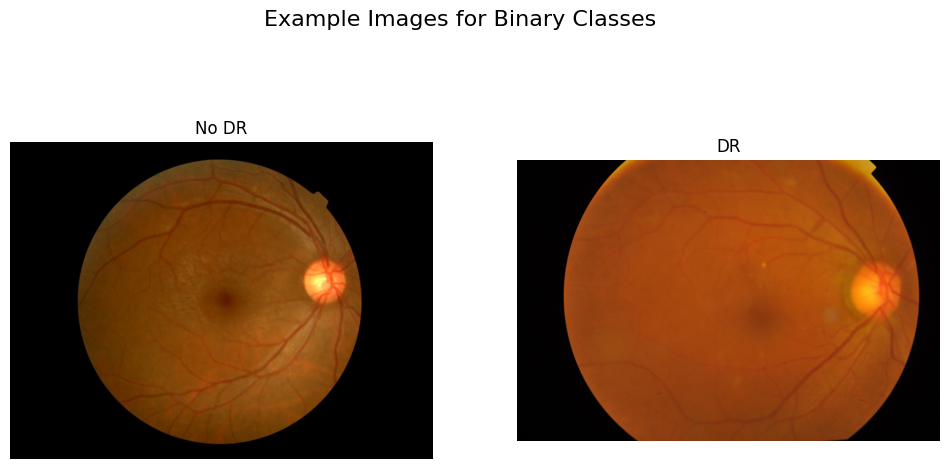

Cleaned CSV saved to: F:\Thessis\data-set\Aptos_1\Retinopathy_info\Retinopathy_cleaned.csv


In [7]:
# Original: 0, 1, 2, 3, 4
# Binary: 0 = No DR, 1 = Any DR
df['binary_label'] = (df['diagnosis'] != 0).astype(int)

# =========================
# 6️⃣ Plot class distribution
# =========================
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='binary_label')
plt.title('Binary Distribution: No DR (0) vs DR (1)')
plt.xlabel('Class')
plt.ylabel('Image Count')
plt.grid(axis='y')
plt.show()

# =========================
# 7️⃣ Show sample images
# =========================
from PIL import Image

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for label in [0, 1]:
    sample_path = df[df['binary_label'] == label].iloc[0]['image_path']
    img = Image.open(sample_path)
    axes[label].imshow(img)
    axes[label].set_title("No DR" if label == 0 else "DR")
    axes[label].axis("off")
plt.suptitle("Example Images for Binary Classes", fontsize=16)
plt.show()

# =========================
# 8️⃣ Optional: Save Cleaned CSV
# =========================
clean_csv_path = r"F:\Thessis\data-set\Aptos_1\Retinopathy_info\Retinopathy_cleaned.csv"
df.to_csv(clean_csv_path, index=False)
print(f"Cleaned CSV saved to: {clean_csv_path}")



In [8]:
import zipfile, os, glob

zip_path = r"F:\Thessis\data-set\Bangladeshi_Dataset.zip"  # 🔹 Update path if needed
extract_path = r"F:\Thessis\data-set\Bangladeshi_Dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [9]:
import pandas as pd
import os
import glob

# 👇 Add this line: set the folder where your dataset is located
extract_path = r"F:\Thessis\data-set\Bangladeshi_Dataset"

img_exts = {'.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff'}
all_files = glob.glob(os.path.join(extract_path, "**", "*.*"), recursive=True)
image_files = [f for f in all_files if os.path.splitext(f)[1].lower() in img_exts]

data = []
for path in image_files:
    folder = os.path.basename(os.path.dirname(path)).lower()
    if "diabetic" in folder:  # DR present
        label = 1
    elif "healthy" in folder:  # No DR
        label = 0
    else:
        continue  # skip if doesn't match expected folder names
    data.append({"image_path": path, "binary_label": label})

df = pd.DataFrame(data)
print(f"✅ Total images found: {len(df)}")
print(df.head())


✅ Total images found: 2533
                                          image_path  binary_label
0  F:\Thessis\data-set\Bangladeshi_Dataset\Diabet...             1
1  F:\Thessis\data-set\Bangladeshi_Dataset\Diabet...             1
2  F:\Thessis\data-set\Bangladeshi_Dataset\Diabet...             1
3  F:\Thessis\data-set\Bangladeshi_Dataset\Diabet...             1
4  F:\Thessis\data-set\Bangladeshi_Dataset\Diabet...             1


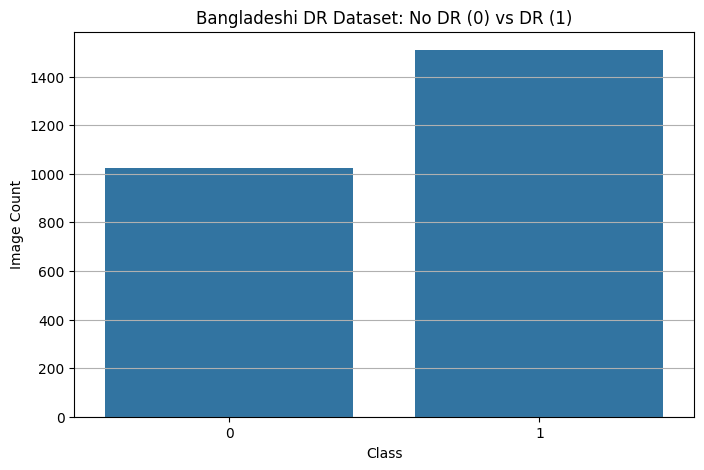

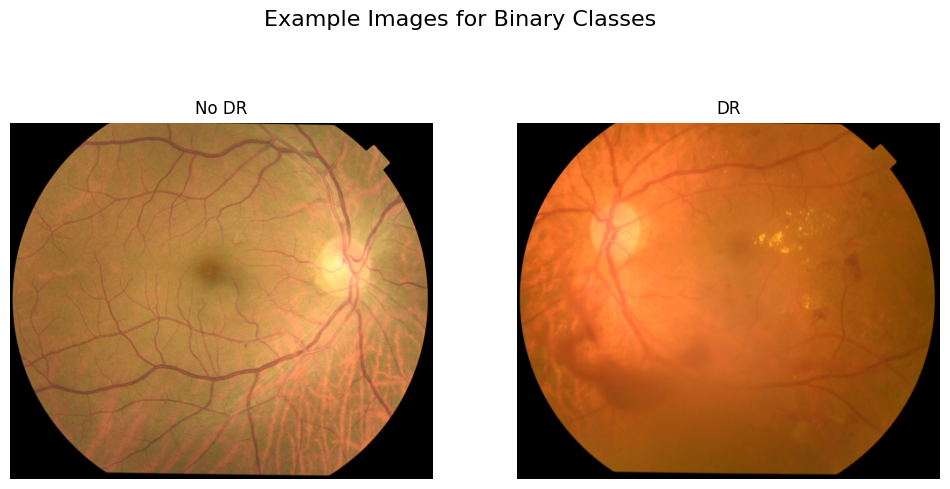

Cleaned CSV saved to: F:\Thessis\data-set\Bangladeshi_Dataset/bangladeshi_cleaned.csv


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='binary_label')
plt.title('Bangladeshi DR Dataset: No DR (0) vs DR (1)')
plt.xlabel('Class')
plt.ylabel('Image Count')
plt.grid(axis='y')
plt.show()

# =========================
# 4️⃣ Show sample images
# =========================
from PIL import Image

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for label in [0, 1]:
    sample_path = df[df['binary_label'] == label].iloc[0]['image_path']
    img = Image.open(sample_path)
    axes[label].imshow(img)
    axes[label].set_title("No DR" if label == 0 else "DR")
    axes[label].axis("off")
plt.suptitle("Example Images for Binary Classes", fontsize=16)
plt.show()

# =========================
# 5️⃣ Save cleaned CSV
# =========================
clean_csv_path = r"F:\Thessis\data-set\Bangladeshi_Dataset/bangladeshi_cleaned.csv"
df.to_csv(clean_csv_path, index=False)
print(f"Cleaned CSV saved to: {clean_csv_path}")

In [15]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split
import cv2
from tqdm import tqdm

# ===== CONFIG =====
CSV_PATH = r"F:\Thessis\data-set\Aptos_1\Retinopathy_info\Retinopathy_cleaned.csv"    # change to bangladeshi_cleaned.csv for BD dataset
OUTPUT_DIR = r"F:\Thessis\data-set"        # where train/val/test folders will be created
IMG_SIZE = 299                             # match training model input
APPLY_CLAHE = True                         # contrast enhancement for DR images
TEST_SIZE = 0.2
VAL_SIZE = 0.5  # 50% of test split → 10% val overall
# ==================

# Load dataframe
df = pd.read_csv(CSV_PATH)

# Stratified split
train_df, temp_df = train_test_split(df, test_size=TEST_SIZE, stratify=df['binary_label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=VAL_SIZE, stratify=temp_df['binary_label'], random_state=42)

splits = {
    "train": train_df,
    "val": val_df,
    "test": test_df
}

# Ensure folders exist
for split_name in ["train", "val", "test"]:
    for label in [0, 1]:
        folder = os.path.join(OUTPUT_DIR, split_name, str(label))
        os.makedirs(folder, exist_ok=True)

# Image preprocessing function
def preprocess_image(image_path, img_size=IMG_SIZE, apply_clahe=APPLY_CLAHE):
    # Read image
    img = cv2.imread(image_path)
    if img is None:
        return None

    # Convert to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Apply CLAHE on each channel if enabled
    if apply_clahe:
        lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        cl = clahe.apply(l)
        limg = cv2.merge((cl, a, b))
        img = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)

    # Resize
    img = cv2.resize(img, (img_size, img_size), interpolation=cv2.INTER_AREA)

    return img

# Process and save images
for split_name, split_df in splits.items():
    print(f"Processing {split_name} split...")
    for _, row in tqdm(split_df.iterrows(), total=len(split_df)):
        label = row['binary_label']
        src_path = row['image_path']
        dst_path = os.path.join(OUTPUT_DIR, split_name, str(label), os.path.basename(src_path))

        img = preprocess_image(src_path)
        if img is None:
            print(f"⚠️ Missing or unreadable file: {src_path}")
            continue

        # Save preprocessed image
        cv2.imwrite(dst_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

# Show counts
print("\n📊 Image count by split and label:")
for split_name in ["train", "val", "test"]:
    total_count = 0
    for label in [0, 1]:
        folder = os.path.join(OUTPUT_DIR, split_name, str(label))
        count = len(os.listdir(folder))
        total_count += count
        print(f"{split_name}/{label}: {count} images")
    print(f"➡ {split_name} total: {total_count} images\n")

print(f"✅ Done! Preprocessed and split dataset saved at: {OUTPUT_DIR}")



Processing train split...


100%|██████████| 2918/2918 [06:29<00:00,  7.50it/s]


Processing val split...


100%|██████████| 365/365 [00:49<00:00,  7.44it/s]


Processing test split...


100%|██████████| 365/365 [00:48<00:00,  7.60it/s]


📊 Image count by split and label:
train/0: 1437 images
train/1: 1481 images
➡ train total: 2918 images

val/0: 179 images
val/1: 186 images
➡ val total: 365 images

test/0: 180 images
test/1: 185 images
➡ test total: 365 images

✅ Done! Preprocessed and split dataset saved at: F:\Thessis\data-set


Processing train split...


100%|██████████| 2026/2026 [03:07<00:00, 10.80it/s]


Processing val split...


100%|██████████| 253/253 [00:16<00:00, 15.12it/s]


Processing test split...


100%|██████████| 254/254 [00:17<00:00, 14.26it/s]



📊 Image count by split and label:
train/0: 2457 images
train/1: 3621 images
➡ train total: 6078 images

val/0: 102 images
val/1: 151 images
➡ val total: 253 images

test/0: 103 images
test/1: 151 images
➡ test total: 254 images

✅ Done! CLAHE + Augmentation applied. Saved at: F:\Thessis\data-set\Bangladeshi_Dataset


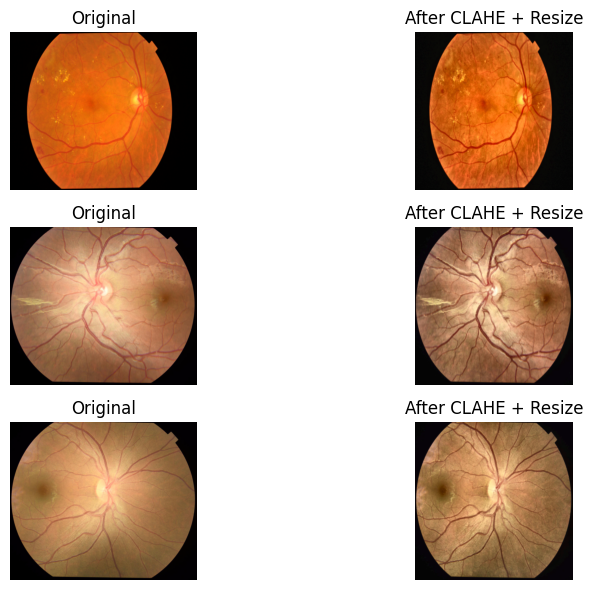

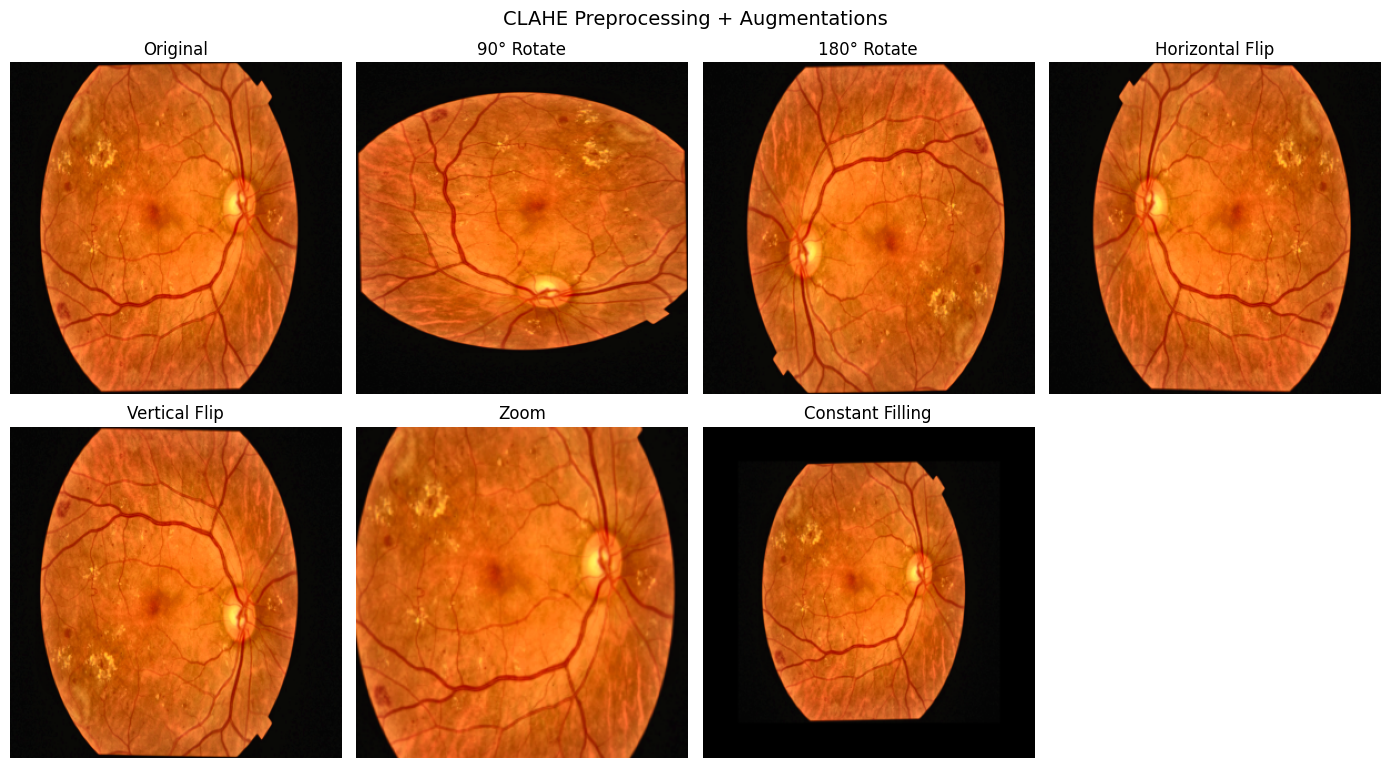

In [17]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split
import cv2
from tqdm import tqdm
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# ===== CONFIG =====
CSV_PATH = r"F:\Thessis\data-set\Bangladeshi_Dataset\bangladeshi_cleaned.csv"    # change to bangladeshi_cleaned.csv for BD dataset
OUTPUT_DIR = r"F:\Thessis\data-set\Bangladeshi_Dataset"        # where train/val/test folders will be created
IMG_SIZE = 299                             # match training model input
APPLY_CLAHE = True                         # contrast enhancement for DR images
TEST_SIZE = 0.2
VAL_SIZE = 0.5                             # 50% of test split → 10% val overall
AUGMENT_MULTIPLIER = 2                     # how many augmentations per image (e.g., 2x dataset size)
# ==================

# Load dataframe
df = pd.read_csv(CSV_PATH)

# Stratified split
train_df, temp_df = train_test_split(df, test_size=TEST_SIZE, stratify=df['binary_label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=VAL_SIZE, stratify=temp_df['binary_label'], random_state=42)

splits = {
    "train": train_df,
    "val": val_df,
    "test": test_df
}

# Ensure folders exist
for split_name in ["train", "val", "test"]:
    for label in [0, 1]:
        folder = os.path.join(OUTPUT_DIR, split_name, str(label))
        os.makedirs(folder, exist_ok=True)

# ===== Image preprocessing (CLAHE) =====
def preprocess_image(image_path, img_size=IMG_SIZE, apply_clahe=APPLY_CLAHE):
    img = cv2.imread(image_path)
    if img is None:
        return None

    # Convert to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Apply CLAHE on each channel if enabled
    if apply_clahe:
        lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        cl = clahe.apply(l)
        limg = cv2.merge((cl, a, b))
        img = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)

    # Resize
    img = cv2.resize(img, (img_size, img_size), interpolation=cv2.INTER_AREA)

    return img

# ===== Augmentation Setup =====
datagen = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='constant'  # Constant filling / padding
)

# ===== Process and Save =====
for split_name, split_df in splits.items():
    print(f"Processing {split_name} split...")
    for _, row in tqdm(split_df.iterrows(), total=len(split_df)):
        label = row['binary_label']
        src_path = row['image_path']
        dst_folder = os.path.join(OUTPUT_DIR, split_name, str(label))

        img = preprocess_image(src_path)
        if img is None:
            print(f"⚠️ Missing or unreadable file: {src_path}")
            continue

        # Save the original preprocessed image
        base_name = os.path.splitext(os.path.basename(src_path))[0]
        save_path = os.path.join(dst_folder, f"{base_name}.jpg")
        cv2.imwrite(save_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

        # Apply augmentations only on training set
        if split_name == "train":
            img_array = np.expand_dims(img, 0)  # add batch dimension
            aug_iter = datagen.flow(img_array, batch_size=1)

            for i in range(AUGMENT_MULTIPLIER):
                aug_img = next(aug_iter)[0].astype(np.uint8)
                aug_path = os.path.join(dst_folder, f"{base_name}_aug{i+1}.jpg")
                cv2.imwrite(aug_path, cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR))

# ===== Summary =====
print("\n📊 Image count by split and label:")
for split_name in ["train", "val", "test"]:
    total_count = 0
    for label in [0, 1]:
        folder = os.path.join(OUTPUT_DIR, split_name, str(label))
        count = len(os.listdir(folder))
        total_count += count
        print(f"{split_name}/{label}: {count} images")
    print(f"➡ {split_name} total: {total_count} images\n")

print(f"✅ Done! CLAHE + Augmentation applied. Saved at: {OUTPUT_DIR}")

# ===== Visualize a few samples =====
sample_paths = list(train_df['image_path'].sample(3, random_state=42))
plt.figure(figsize=(10, 6))

for i, path in enumerate(sample_paths):
    original = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    processed = preprocess_image(path)

    plt.subplot(3, 2, 2*i + 1)
    plt.imshow(original)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(3, 2, 2*i + 2)
    plt.imshow(processed)
    plt.title("After CLAHE + Resize")
    plt.axis("off")

plt.tight_layout()
plt.show()




# ===== Show all preprocessing and augmentations for one sample image =====
import matplotlib.pyplot as plt

# Pick one random sample from training set
sample_path = train_df['image_path'].sample(1, random_state=42).iloc[0]
original = cv2.cvtColor(cv2.imread(sample_path), cv2.COLOR_BGR2RGB)
preprocessed = preprocess_image(sample_path)

# Create augmented versions manually for visualization
def augment_image(img):
    aug_images = {}

    # Original CLAHE
    aug_images['Original'] = img

    # 90° rotation
    aug_images['90° Rotate'] = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

    # 180° rotation
    aug_images['180° Rotate'] = cv2.rotate(img, cv2.ROTATE_180)

    # Horizontal Flip
    aug_images['Horizontal Flip'] = cv2.flip(img, 1)

    # Vertical Flip
    aug_images['Vertical Flip'] = cv2.flip(img, 0)

    # Zoom (center crop and resize)
    h, w, _ = img.shape
    zoom_factor = 0.8
    zoomed = img[int(h*(1-zoom_factor)/2):int(h*(1+zoom_factor)/2),
                 int(w*(1-zoom_factor)/2):int(w*(1+zoom_factor)/2)]
    zoomed = cv2.resize(zoomed, (w, h))
    aug_images['Zoom'] = zoomed

    # Constant filling (padding)
    padded = cv2.copyMakeBorder(img, 40, 40, 40, 40, cv2.BORDER_CONSTANT, value=[0,0,0])
    padded = cv2.resize(padded, (w, h))
    aug_images['Constant Filling'] = padded

    return aug_images

# Apply augmentations
augmented_images = augment_image(preprocessed)

# Plot all augmentations
plt.figure(figsize=(14, 8))
for i, (title, image) in enumerate(augmented_images.items()):
    plt.subplot(2, 4, i+1)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

plt.suptitle("CLAHE Preprocessing + Augmentations", fontsize=14)
plt.tight_layout()
plt.show()


In [18]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


True
1
NVIDIA GeForce RTX 3050


#ResNet18 + InceptionV3 + ViT-Tiny (timm)
#Binary: single logit + Sigmoid
#Focal BCE (+ label smoothing) + AMP + Cosine LR
#Combined visuals (curves + ROC + CM + reports) + Grad-CAM overla

Using device: cuda
GPU: NVIDIA GeForce RTX 3050
Memory Allocated: 0.0 MB
Memory Cached:    0.0 MB

[Path Check] F:\Thessis\data-set\Aptos_1\aptos_split
F:\Thessis\data-set\Aptos_1\aptos_split\train\0  -> exists=True, count=1437
F:\Thessis\data-set\Aptos_1\aptos_split\train\1  -> exists=True, count=1481
F:\Thessis\data-set\Aptos_1\aptos_split\val\0  -> exists=True, count=179
F:\Thessis\data-set\Aptos_1\aptos_split\val\1  -> exists=True, count=186
F:\Thessis\data-set\Aptos_1\aptos_split\test\0  -> exists=True, count=180
F:\Thessis\data-set\Aptos_1\aptos_split\test\1  -> exists=True, count=185

[Path Check] F:\Thessis\data-set\Bangladeshi_Dataset\bd_split
F:\Thessis\data-set\Bangladeshi_Dataset\bd_split\train\0  -> exists=True, count=819
F:\Thessis\data-set\Bangladeshi_Dataset\bd_split\train\1  -> exists=True, count=1207
F:\Thessis\data-set\Bangladeshi_Dataset\bd_split\val\0  -> exists=True, count=102
F:\Thessis\data-set\Bangladeshi_Dataset\bd_split\val\1  -> exists=True, count=151
F:\The

C:\Users\Rezwan Ahmed\AppData\Local\Temp\ipykernel_18560\1591494418.py:234: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler(enabled=USE_AMP)


[APTOS 2019] ep1/100:   0%|          | 0/365 [00:00<?, ?it/s]

C:\Users\Rezwan Ahmed\AppData\Local\Temp\ipykernel_18560\1591494418.py:249: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=USE_AMP):  # fixed
C:\Users\Rezwan Ahmed\AppData\Local\Temp\ipykernel_18560\1591494418.py:270: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=USE_AMP):  # fixed


💾 Saved best → checkpoints\best_aptos.pt
epoch 1: TrainLoss 0.0572 | TrainAcc 0.9219 | ValLoss 0.0274 | ValAcc 0.9644 | Time 157.9s


[APTOS 2019] ep2/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 2: TrainLoss 0.0358 | TrainAcc 0.9578 | ValLoss 0.0250 | ValAcc 0.9616 | Time 88.9s


[APTOS 2019] ep3/100:   0%|          | 0/365 [00:00<?, ?it/s]

💾 Saved best → checkpoints\best_aptos.pt
epoch 3: TrainLoss 0.0279 | TrainAcc 0.9681 | ValLoss 0.0212 | ValAcc 0.9671 | Time 89.4s


[APTOS 2019] ep4/100:   0%|          | 0/365 [00:00<?, ?it/s]

💾 Saved best → checkpoints\best_aptos.pt
epoch 4: TrainLoss 0.0265 | TrainAcc 0.9746 | ValLoss 0.0139 | ValAcc 0.9890 | Time 89.3s


[APTOS 2019] ep5/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 5: TrainLoss 0.0230 | TrainAcc 0.9729 | ValLoss 0.0182 | ValAcc 0.9808 | Time 89.0s


[APTOS 2019] ep6/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 6: TrainLoss 0.0236 | TrainAcc 0.9743 | ValLoss 0.0326 | ValAcc 0.9781 | Time 89.0s


[APTOS 2019] ep7/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 7: TrainLoss 0.0193 | TrainAcc 0.9757 | ValLoss 0.0149 | ValAcc 0.9890 | Time 89.2s


[APTOS 2019] ep8/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 8: TrainLoss 0.0205 | TrainAcc 0.9784 | ValLoss 0.0188 | ValAcc 0.9753 | Time 90.2s


[APTOS 2019] ep9/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 9: TrainLoss 0.0196 | TrainAcc 0.9805 | ValLoss 0.0173 | ValAcc 0.9836 | Time 92.4s


[APTOS 2019] ep10/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 10: TrainLoss 0.0163 | TrainAcc 0.9815 | ValLoss 0.0277 | ValAcc 0.9671 | Time 92.5s


[APTOS 2019] ep11/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 11: TrainLoss 0.0293 | TrainAcc 0.9695 | ValLoss 0.0158 | ValAcc 0.9863 | Time 92.5s


[APTOS 2019] ep12/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 12: TrainLoss 0.0171 | TrainAcc 0.9842 | ValLoss 0.0205 | ValAcc 0.9781 | Time 92.9s


[APTOS 2019] ep13/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 13: TrainLoss 0.0180 | TrainAcc 0.9815 | ValLoss 0.0328 | ValAcc 0.9890 | Time 94.2s


[APTOS 2019] ep14/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 14: TrainLoss 0.0180 | TrainAcc 0.9812 | ValLoss 0.0193 | ValAcc 0.9808 | Time 92.3s


[APTOS 2019] ep15/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 15: TrainLoss 0.0200 | TrainAcc 0.9777 | ValLoss 0.0151 | ValAcc 0.9808 | Time 92.2s


[APTOS 2019] ep16/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 16: TrainLoss 0.0152 | TrainAcc 0.9825 | ValLoss 0.0181 | ValAcc 0.9808 | Time 92.4s


[APTOS 2019] ep17/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 17: TrainLoss 0.0120 | TrainAcc 0.9901 | ValLoss 0.0169 | ValAcc 0.9863 | Time 92.5s


[APTOS 2019] ep18/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 18: TrainLoss 0.0155 | TrainAcc 0.9836 | ValLoss 0.0175 | ValAcc 0.9836 | Time 92.2s


[APTOS 2019] ep19/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 19: TrainLoss 0.0183 | TrainAcc 0.9805 | ValLoss 0.0230 | ValAcc 0.9781 | Time 92.0s


[APTOS 2019] ep20/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 20: TrainLoss 0.0161 | TrainAcc 0.9849 | ValLoss 0.0205 | ValAcc 0.9781 | Time 92.8s


[APTOS 2019] ep21/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 21: TrainLoss 0.0184 | TrainAcc 0.9818 | ValLoss 0.0255 | ValAcc 0.9671 | Time 92.2s


[APTOS 2019] ep22/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 22: TrainLoss 0.0112 | TrainAcc 0.9894 | ValLoss 0.0138 | ValAcc 0.9836 | Time 90.7s


[APTOS 2019] ep23/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 23: TrainLoss 0.0114 | TrainAcc 0.9877 | ValLoss 0.0172 | ValAcc 0.9781 | Time 89.1s


[APTOS 2019] ep24/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 24: TrainLoss 0.0131 | TrainAcc 0.9866 | ValLoss 0.0141 | ValAcc 0.9781 | Time 89.0s


[APTOS 2019] ep25/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 25: TrainLoss 0.0119 | TrainAcc 0.9846 | ValLoss 0.0203 | ValAcc 0.9808 | Time 92.0s


[APTOS 2019] ep26/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 26: TrainLoss 0.0135 | TrainAcc 0.9842 | ValLoss 0.0164 | ValAcc 0.9863 | Time 92.4s


[APTOS 2019] ep27/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 27: TrainLoss 0.0116 | TrainAcc 0.9883 | ValLoss 0.0281 | ValAcc 0.9671 | Time 92.9s


[APTOS 2019] ep28/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 28: TrainLoss 0.0116 | TrainAcc 0.9901 | ValLoss 0.0241 | ValAcc 0.9808 | Time 92.8s


[APTOS 2019] ep29/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 29: TrainLoss 0.0082 | TrainAcc 0.9928 | ValLoss 0.0183 | ValAcc 0.9808 | Time 92.5s


[APTOS 2019] ep30/100:   0%|          | 0/365 [00:00<?, ?it/s]

💾 Saved best → checkpoints\best_aptos.pt
epoch 30: TrainLoss 0.0096 | TrainAcc 0.9907 | ValLoss 0.0113 | ValAcc 0.9945 | Time 93.0s


[APTOS 2019] ep31/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 31: TrainLoss 0.0102 | TrainAcc 0.9877 | ValLoss 0.0178 | ValAcc 0.9890 | Time 92.6s


[APTOS 2019] ep32/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 32: TrainLoss 0.0071 | TrainAcc 0.9928 | ValLoss 0.0264 | ValAcc 0.9726 | Time 92.6s


[APTOS 2019] ep33/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 33: TrainLoss 0.0058 | TrainAcc 0.9959 | ValLoss 0.0289 | ValAcc 0.9699 | Time 92.4s


[APTOS 2019] ep34/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 34: TrainLoss 0.0064 | TrainAcc 0.9931 | ValLoss 0.0197 | ValAcc 0.9863 | Time 92.2s


[APTOS 2019] ep35/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 35: TrainLoss 0.0099 | TrainAcc 0.9887 | ValLoss 0.0185 | ValAcc 0.9753 | Time 92.1s


[APTOS 2019] ep36/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 36: TrainLoss 0.0077 | TrainAcc 0.9918 | ValLoss 0.0172 | ValAcc 0.9863 | Time 92.8s


[APTOS 2019] ep37/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 37: TrainLoss 0.0077 | TrainAcc 0.9935 | ValLoss 0.0246 | ValAcc 0.9808 | Time 92.3s


[APTOS 2019] ep38/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 38: TrainLoss 0.0070 | TrainAcc 0.9921 | ValLoss 0.0209 | ValAcc 0.9836 | Time 92.4s


[APTOS 2019] ep39/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 39: TrainLoss 0.0077 | TrainAcc 0.9928 | ValLoss 0.0159 | ValAcc 0.9890 | Time 92.1s


[APTOS 2019] ep40/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 40: TrainLoss 0.0057 | TrainAcc 0.9949 | ValLoss 0.0170 | ValAcc 0.9808 | Time 91.2s


[APTOS 2019] ep41/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 41: TrainLoss 0.0070 | TrainAcc 0.9938 | ValLoss 0.0259 | ValAcc 0.9781 | Time 89.3s


[APTOS 2019] ep42/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 42: TrainLoss 0.0091 | TrainAcc 0.9914 | ValLoss 0.0222 | ValAcc 0.9808 | Time 89.4s


[APTOS 2019] ep43/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 43: TrainLoss 0.0067 | TrainAcc 0.9925 | ValLoss 0.0199 | ValAcc 0.9863 | Time 89.3s


[APTOS 2019] ep44/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 44: TrainLoss 0.0059 | TrainAcc 0.9952 | ValLoss 0.0203 | ValAcc 0.9781 | Time 89.1s


[APTOS 2019] ep45/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 45: TrainLoss 0.0051 | TrainAcc 0.9955 | ValLoss 0.0222 | ValAcc 0.9808 | Time 89.0s


[APTOS 2019] ep46/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 46: TrainLoss 0.0070 | TrainAcc 0.9945 | ValLoss 0.0253 | ValAcc 0.9781 | Time 89.0s


[APTOS 2019] ep47/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 47: TrainLoss 0.0060 | TrainAcc 0.9938 | ValLoss 0.0182 | ValAcc 0.9890 | Time 89.0s


[APTOS 2019] ep48/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 48: TrainLoss 0.0050 | TrainAcc 0.9942 | ValLoss 0.0174 | ValAcc 0.9781 | Time 89.2s


[APTOS 2019] ep49/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 49: TrainLoss 0.0045 | TrainAcc 0.9969 | ValLoss 0.0195 | ValAcc 0.9808 | Time 88.9s


[APTOS 2019] ep50/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 50: TrainLoss 0.0046 | TrainAcc 0.9962 | ValLoss 0.0149 | ValAcc 0.9836 | Time 89.0s


[APTOS 2019] ep51/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 51: TrainLoss 0.0067 | TrainAcc 0.9949 | ValLoss 0.0273 | ValAcc 0.9808 | Time 89.0s


[APTOS 2019] ep52/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 52: TrainLoss 0.0040 | TrainAcc 0.9969 | ValLoss 0.0167 | ValAcc 0.9836 | Time 89.4s


[APTOS 2019] ep53/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 53: TrainLoss 0.0043 | TrainAcc 0.9966 | ValLoss 0.0204 | ValAcc 0.9808 | Time 89.5s


[APTOS 2019] ep54/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 54: TrainLoss 0.0051 | TrainAcc 0.9952 | ValLoss 0.0228 | ValAcc 0.9753 | Time 89.1s


[APTOS 2019] ep55/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 55: TrainLoss 0.0035 | TrainAcc 0.9976 | ValLoss 0.0223 | ValAcc 0.9781 | Time 88.8s


[APTOS 2019] ep56/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 56: TrainLoss 0.0038 | TrainAcc 0.9969 | ValLoss 0.0168 | ValAcc 0.9808 | Time 89.0s


[APTOS 2019] ep57/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 57: TrainLoss 0.0040 | TrainAcc 0.9962 | ValLoss 0.0178 | ValAcc 0.9836 | Time 88.9s


[APTOS 2019] ep58/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 58: TrainLoss 0.0042 | TrainAcc 0.9959 | ValLoss 0.0263 | ValAcc 0.9781 | Time 88.9s


[APTOS 2019] ep59/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 59: TrainLoss 0.0041 | TrainAcc 0.9955 | ValLoss 0.0229 | ValAcc 0.9781 | Time 89.3s


[APTOS 2019] ep60/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 60: TrainLoss 0.0048 | TrainAcc 0.9955 | ValLoss 0.0210 | ValAcc 0.9808 | Time 89.3s


[APTOS 2019] ep61/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 61: TrainLoss 0.0040 | TrainAcc 0.9955 | ValLoss 0.0234 | ValAcc 0.9781 | Time 89.4s


[APTOS 2019] ep62/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 62: TrainLoss 0.0027 | TrainAcc 0.9979 | ValLoss 0.0178 | ValAcc 0.9836 | Time 89.1s


[APTOS 2019] ep63/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 63: TrainLoss 0.0028 | TrainAcc 0.9979 | ValLoss 0.0200 | ValAcc 0.9808 | Time 89.3s


[APTOS 2019] ep64/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 64: TrainLoss 0.0027 | TrainAcc 0.9983 | ValLoss 0.0169 | ValAcc 0.9781 | Time 89.1s


[APTOS 2019] ep65/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 65: TrainLoss 0.0031 | TrainAcc 0.9979 | ValLoss 0.0159 | ValAcc 0.9836 | Time 89.5s


[APTOS 2019] ep66/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 66: TrainLoss 0.0044 | TrainAcc 0.9979 | ValLoss 0.0110 | ValAcc 0.9808 | Time 89.1s


[APTOS 2019] ep67/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 67: TrainLoss 0.0045 | TrainAcc 0.9969 | ValLoss 0.0210 | ValAcc 0.9836 | Time 89.2s


[APTOS 2019] ep68/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 68: TrainLoss 0.0037 | TrainAcc 0.9976 | ValLoss 0.0204 | ValAcc 0.9836 | Time 89.0s


[APTOS 2019] ep69/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 69: TrainLoss 0.0029 | TrainAcc 0.9986 | ValLoss 0.0216 | ValAcc 0.9836 | Time 89.4s


[APTOS 2019] ep70/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 70: TrainLoss 0.0029 | TrainAcc 0.9990 | ValLoss 0.0252 | ValAcc 0.9808 | Time 89.6s


[APTOS 2019] ep71/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 71: TrainLoss 0.0025 | TrainAcc 0.9986 | ValLoss 0.0189 | ValAcc 0.9863 | Time 89.0s


[APTOS 2019] ep72/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 72: TrainLoss 0.0043 | TrainAcc 0.9966 | ValLoss 0.0236 | ValAcc 0.9808 | Time 89.1s


[APTOS 2019] ep73/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 73: TrainLoss 0.0025 | TrainAcc 0.9986 | ValLoss 0.0224 | ValAcc 0.9863 | Time 89.3s


[APTOS 2019] ep74/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 74: TrainLoss 0.0028 | TrainAcc 0.9979 | ValLoss 0.0199 | ValAcc 0.9863 | Time 89.1s


[APTOS 2019] ep75/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 75: TrainLoss 0.0028 | TrainAcc 0.9986 | ValLoss 0.0227 | ValAcc 0.9808 | Time 89.4s


[APTOS 2019] ep76/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 76: TrainLoss 0.0027 | TrainAcc 0.9973 | ValLoss 0.0180 | ValAcc 0.9836 | Time 89.1s


[APTOS 2019] ep77/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 77: TrainLoss 0.0028 | TrainAcc 0.9983 | ValLoss 0.0189 | ValAcc 0.9836 | Time 89.2s


[APTOS 2019] ep78/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 78: TrainLoss 0.0031 | TrainAcc 0.9973 | ValLoss 0.0192 | ValAcc 0.9863 | Time 89.2s


[APTOS 2019] ep79/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 79: TrainLoss 0.0032 | TrainAcc 0.9979 | ValLoss 0.0199 | ValAcc 0.9808 | Time 89.2s


[APTOS 2019] ep80/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 80: TrainLoss 0.0028 | TrainAcc 0.9973 | ValLoss 0.0183 | ValAcc 0.9836 | Time 93.8s


[APTOS 2019] ep81/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 81: TrainLoss 0.0026 | TrainAcc 0.9979 | ValLoss 0.0182 | ValAcc 0.9836 | Time 89.2s


[APTOS 2019] ep82/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 82: TrainLoss 0.0024 | TrainAcc 0.9983 | ValLoss 0.0180 | ValAcc 0.9836 | Time 89.0s


[APTOS 2019] ep83/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 83: TrainLoss 0.0024 | TrainAcc 0.9986 | ValLoss 0.0150 | ValAcc 0.9836 | Time 88.8s


[APTOS 2019] ep84/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 84: TrainLoss 0.0026 | TrainAcc 0.9983 | ValLoss 0.0156 | ValAcc 0.9836 | Time 89.2s


[APTOS 2019] ep85/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 85: TrainLoss 0.0026 | TrainAcc 0.9990 | ValLoss 0.0192 | ValAcc 0.9836 | Time 89.2s


[APTOS 2019] ep86/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 86: TrainLoss 0.0023 | TrainAcc 0.9986 | ValLoss 0.0181 | ValAcc 0.9863 | Time 104.3s


[APTOS 2019] ep87/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 87: TrainLoss 0.0024 | TrainAcc 0.9979 | ValLoss 0.0165 | ValAcc 0.9863 | Time 97.9s


[APTOS 2019] ep88/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 88: TrainLoss 0.0022 | TrainAcc 0.9983 | ValLoss 0.0215 | ValAcc 0.9836 | Time 89.0s


[APTOS 2019] ep89/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 89: TrainLoss 0.0026 | TrainAcc 0.9973 | ValLoss 0.0144 | ValAcc 0.9836 | Time 88.8s


[APTOS 2019] ep90/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 90: TrainLoss 0.0026 | TrainAcc 0.9986 | ValLoss 0.0190 | ValAcc 0.9836 | Time 89.1s


[APTOS 2019] ep91/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 91: TrainLoss 0.0021 | TrainAcc 0.9993 | ValLoss 0.0195 | ValAcc 0.9863 | Time 89.0s


[APTOS 2019] ep92/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 92: TrainLoss 0.0022 | TrainAcc 0.9993 | ValLoss 0.0188 | ValAcc 0.9863 | Time 88.7s


[APTOS 2019] ep93/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 93: TrainLoss 0.0023 | TrainAcc 0.9986 | ValLoss 0.0206 | ValAcc 0.9836 | Time 88.7s


[APTOS 2019] ep94/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 94: TrainLoss 0.0023 | TrainAcc 0.9990 | ValLoss 0.0189 | ValAcc 0.9836 | Time 89.2s


[APTOS 2019] ep95/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 95: TrainLoss 0.0022 | TrainAcc 0.9986 | ValLoss 0.0191 | ValAcc 0.9863 | Time 89.3s


[APTOS 2019] ep96/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 96: TrainLoss 0.0023 | TrainAcc 0.9986 | ValLoss 0.0188 | ValAcc 0.9836 | Time 88.9s


[APTOS 2019] ep97/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 97: TrainLoss 0.0027 | TrainAcc 0.9983 | ValLoss 0.0206 | ValAcc 0.9836 | Time 88.9s


[APTOS 2019] ep98/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 98: TrainLoss 0.0022 | TrainAcc 0.9983 | ValLoss 0.0187 | ValAcc 0.9836 | Time 88.6s


[APTOS 2019] ep99/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 99: TrainLoss 0.0022 | TrainAcc 0.9986 | ValLoss 0.0197 | ValAcc 0.9836 | Time 89.1s


[APTOS 2019] ep100/100:   0%|          | 0/365 [00:00<?, ?it/s]

epoch 100: TrainLoss 0.0023 | TrainAcc 0.9986 | ValLoss 0.0194 | ValAcc 0.9836 | Time 89.1s
Loaded best ckpt for test.


C:\Users\Rezwan Ahmed\AppData\Local\Temp\ipykernel_18560\1591494418.py:310: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=USE_AMP):  # fixed


📦 APTOS 2019 Test Accuracy: 0.9918
Sanity: torch.Size([8, 3, 304, 304]) torch.Size([8]) — Bangladeshi DR

==== Bangladeshi DR ====
Train counts: class 0=819, class 1=1207 | Focal α=0.839


[Bangladeshi DR] ep1/100:   0%|          | 0/254 [00:00<?, ?it/s]

💾 Saved best → checkpoints\best_bd.pt
epoch 1: TrainLoss 0.0546 | TrainAcc 0.9097 | ValLoss 0.0546 | ValAcc 0.9091 | Time 95.9s


[Bangladeshi DR] ep2/100:   0%|          | 0/254 [00:00<?, ?it/s]

💾 Saved best → checkpoints\best_bd.pt
epoch 2: TrainLoss 0.0343 | TrainAcc 0.9432 | ValLoss 0.0216 | ValAcc 0.9407 | Time 59.6s


[Bangladeshi DR] ep3/100:   0%|          | 0/254 [00:00<?, ?it/s]

💾 Saved best → checkpoints\best_bd.pt
epoch 3: TrainLoss 0.0261 | TrainAcc 0.9610 | ValLoss 0.0166 | ValAcc 0.9881 | Time 59.9s


[Bangladeshi DR] ep4/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 4: TrainLoss 0.0168 | TrainAcc 0.9748 | ValLoss 0.0215 | ValAcc 0.9802 | Time 59.3s


[Bangladeshi DR] ep5/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 5: TrainLoss 0.0236 | TrainAcc 0.9714 | ValLoss 0.0191 | ValAcc 0.9763 | Time 59.5s


[Bangladeshi DR] ep6/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 6: TrainLoss 0.0193 | TrainAcc 0.9748 | ValLoss 0.0275 | ValAcc 0.9644 | Time 59.6s


[Bangladeshi DR] ep7/100:   0%|          | 0/254 [00:00<?, ?it/s]

💾 Saved best → checkpoints\best_bd.pt
epoch 7: TrainLoss 0.0259 | TrainAcc 0.9600 | ValLoss 0.0084 | ValAcc 0.9960 | Time 59.8s


[Bangladeshi DR] ep8/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 8: TrainLoss 0.0211 | TrainAcc 0.9738 | ValLoss 0.0073 | ValAcc 0.9960 | Time 59.5s


[Bangladeshi DR] ep9/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 9: TrainLoss 0.0180 | TrainAcc 0.9783 | ValLoss 0.0147 | ValAcc 0.9802 | Time 59.5s


[Bangladeshi DR] ep10/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 10: TrainLoss 0.0202 | TrainAcc 0.9768 | ValLoss 0.0083 | ValAcc 0.9921 | Time 59.7s


[Bangladeshi DR] ep11/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 11: TrainLoss 0.0146 | TrainAcc 0.9812 | ValLoss 0.0076 | ValAcc 0.9921 | Time 59.4s


[Bangladeshi DR] ep12/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 12: TrainLoss 0.0161 | TrainAcc 0.9817 | ValLoss 0.0368 | ValAcc 0.9605 | Time 59.5s


[Bangladeshi DR] ep13/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 13: TrainLoss 0.0111 | TrainAcc 0.9862 | ValLoss 0.0117 | ValAcc 0.9842 | Time 59.5s


[Bangladeshi DR] ep14/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 14: TrainLoss 0.0103 | TrainAcc 0.9857 | ValLoss 0.0116 | ValAcc 0.9881 | Time 59.4s


[Bangladeshi DR] ep15/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 15: TrainLoss 0.0086 | TrainAcc 0.9906 | ValLoss 0.0274 | ValAcc 0.9486 | Time 59.9s


[Bangladeshi DR] ep16/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 16: TrainLoss 0.0119 | TrainAcc 0.9862 | ValLoss 0.0181 | ValAcc 0.9802 | Time 59.4s


[Bangladeshi DR] ep17/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 17: TrainLoss 0.0087 | TrainAcc 0.9906 | ValLoss 0.0098 | ValAcc 0.9763 | Time 59.6s


[Bangladeshi DR] ep18/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 18: TrainLoss 0.0085 | TrainAcc 0.9906 | ValLoss 0.0165 | ValAcc 0.9802 | Time 59.4s


[Bangladeshi DR] ep19/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 19: TrainLoss 0.0073 | TrainAcc 0.9926 | ValLoss 0.0157 | ValAcc 0.9684 | Time 59.3s


[Bangladeshi DR] ep20/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 20: TrainLoss 0.0097 | TrainAcc 0.9901 | ValLoss 0.0155 | ValAcc 0.9723 | Time 59.3s


[Bangladeshi DR] ep21/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 21: TrainLoss 0.0160 | TrainAcc 0.9812 | ValLoss 0.0148 | ValAcc 0.9644 | Time 59.3s


[Bangladeshi DR] ep22/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 22: TrainLoss 0.0073 | TrainAcc 0.9921 | ValLoss 0.0080 | ValAcc 0.9842 | Time 59.4s


[Bangladeshi DR] ep23/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 23: TrainLoss 0.0071 | TrainAcc 0.9916 | ValLoss 0.0263 | ValAcc 0.9644 | Time 59.8s


[Bangladeshi DR] ep24/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 24: TrainLoss 0.0161 | TrainAcc 0.9877 | ValLoss 0.0075 | ValAcc 0.9921 | Time 59.4s


[Bangladeshi DR] ep25/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 25: TrainLoss 0.0115 | TrainAcc 0.9852 | ValLoss 0.0092 | ValAcc 0.9921 | Time 59.5s


[Bangladeshi DR] ep26/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 26: TrainLoss 0.0056 | TrainAcc 0.9956 | ValLoss 0.0043 | ValAcc 0.9960 | Time 59.6s


[Bangladeshi DR] ep27/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 27: TrainLoss 0.0097 | TrainAcc 0.9867 | ValLoss 0.0089 | ValAcc 0.9960 | Time 59.5s


[Bangladeshi DR] ep28/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 28: TrainLoss 0.0110 | TrainAcc 0.9891 | ValLoss 0.0106 | ValAcc 0.9881 | Time 59.7s


[Bangladeshi DR] ep29/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 29: TrainLoss 0.0057 | TrainAcc 0.9941 | ValLoss 0.0186 | ValAcc 0.9684 | Time 59.6s


[Bangladeshi DR] ep30/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 30: TrainLoss 0.0060 | TrainAcc 0.9931 | ValLoss 0.0114 | ValAcc 0.9802 | Time 59.4s


[Bangladeshi DR] ep31/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 31: TrainLoss 0.0075 | TrainAcc 0.9911 | ValLoss 0.0140 | ValAcc 0.9842 | Time 59.6s


[Bangladeshi DR] ep32/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 32: TrainLoss 0.0071 | TrainAcc 0.9886 | ValLoss 0.0125 | ValAcc 0.9921 | Time 59.4s


[Bangladeshi DR] ep33/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 33: TrainLoss 0.0054 | TrainAcc 0.9946 | ValLoss 0.0223 | ValAcc 0.9684 | Time 59.3s


[Bangladeshi DR] ep34/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 34: TrainLoss 0.0056 | TrainAcc 0.9921 | ValLoss 0.0111 | ValAcc 0.9881 | Time 59.6s


[Bangladeshi DR] ep35/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 35: TrainLoss 0.0063 | TrainAcc 0.9936 | ValLoss 0.0063 | ValAcc 0.9921 | Time 59.3s


[Bangladeshi DR] ep36/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 36: TrainLoss 0.0058 | TrainAcc 0.9956 | ValLoss 0.0149 | ValAcc 0.9802 | Time 59.2s


[Bangladeshi DR] ep37/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 37: TrainLoss 0.0074 | TrainAcc 0.9946 | ValLoss 0.0116 | ValAcc 0.9881 | Time 59.5s


[Bangladeshi DR] ep38/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 38: TrainLoss 0.0057 | TrainAcc 0.9951 | ValLoss 0.0061 | ValAcc 0.9921 | Time 59.7s


[Bangladeshi DR] ep39/100:   0%|          | 0/254 [00:00<?, ?it/s]

💾 Saved best → checkpoints\best_bd.pt
epoch 39: TrainLoss 0.0116 | TrainAcc 0.9817 | ValLoss 0.0039 | ValAcc 1.0000 | Time 60.0s


[Bangladeshi DR] ep40/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 40: TrainLoss 0.0091 | TrainAcc 0.9896 | ValLoss 0.0140 | ValAcc 0.9842 | Time 59.6s


[Bangladeshi DR] ep41/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 41: TrainLoss 0.0038 | TrainAcc 0.9961 | ValLoss 0.0077 | ValAcc 0.9921 | Time 59.5s


[Bangladeshi DR] ep42/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 42: TrainLoss 0.0044 | TrainAcc 0.9946 | ValLoss 0.0079 | ValAcc 0.9842 | Time 59.4s


[Bangladeshi DR] ep43/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 43: TrainLoss 0.0049 | TrainAcc 0.9946 | ValLoss 0.0218 | ValAcc 0.9881 | Time 59.6s


[Bangladeshi DR] ep44/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 44: TrainLoss 0.0054 | TrainAcc 0.9946 | ValLoss 0.0071 | ValAcc 0.9881 | Time 59.5s


[Bangladeshi DR] ep45/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 45: TrainLoss 0.0036 | TrainAcc 0.9975 | ValLoss 0.0132 | ValAcc 0.9881 | Time 59.2s


[Bangladeshi DR] ep46/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 46: TrainLoss 0.0032 | TrainAcc 0.9970 | ValLoss 0.0055 | ValAcc 0.9921 | Time 59.4s


[Bangladeshi DR] ep47/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 47: TrainLoss 0.0043 | TrainAcc 0.9931 | ValLoss 0.0052 | ValAcc 0.9881 | Time 59.6s


[Bangladeshi DR] ep48/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 48: TrainLoss 0.0073 | TrainAcc 0.9946 | ValLoss 0.0038 | ValAcc 0.9960 | Time 59.7s


[Bangladeshi DR] ep49/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 49: TrainLoss 0.0032 | TrainAcc 0.9975 | ValLoss 0.0054 | ValAcc 0.9921 | Time 59.8s


[Bangladeshi DR] ep50/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 50: TrainLoss 0.0047 | TrainAcc 0.9965 | ValLoss 0.0031 | ValAcc 1.0000 | Time 59.5s


[Bangladeshi DR] ep51/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 51: TrainLoss 0.0046 | TrainAcc 0.9941 | ValLoss 0.0040 | ValAcc 0.9960 | Time 59.8s


[Bangladeshi DR] ep52/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 52: TrainLoss 0.0031 | TrainAcc 0.9980 | ValLoss 0.0029 | ValAcc 0.9960 | Time 59.3s


[Bangladeshi DR] ep53/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 53: TrainLoss 0.0047 | TrainAcc 0.9936 | ValLoss 0.0075 | ValAcc 0.9881 | Time 59.6s


[Bangladeshi DR] ep54/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 54: TrainLoss 0.0032 | TrainAcc 0.9980 | ValLoss 0.0039 | ValAcc 0.9960 | Time 59.5s


[Bangladeshi DR] ep55/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 55: TrainLoss 0.0023 | TrainAcc 0.9985 | ValLoss 0.0051 | ValAcc 0.9921 | Time 59.4s


[Bangladeshi DR] ep56/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 56: TrainLoss 0.0034 | TrainAcc 0.9965 | ValLoss 0.0110 | ValAcc 0.9881 | Time 59.4s


[Bangladeshi DR] ep57/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 57: TrainLoss 0.0025 | TrainAcc 0.9985 | ValLoss 0.0038 | ValAcc 0.9960 | Time 59.5s


[Bangladeshi DR] ep58/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 58: TrainLoss 0.0032 | TrainAcc 0.9970 | ValLoss 0.0062 | ValAcc 0.9921 | Time 59.4s


[Bangladeshi DR] ep59/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 59: TrainLoss 0.0021 | TrainAcc 0.9990 | ValLoss 0.0065 | ValAcc 0.9881 | Time 59.2s


[Bangladeshi DR] ep60/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 60: TrainLoss 0.0018 | TrainAcc 0.9995 | ValLoss 0.0108 | ValAcc 0.9921 | Time 59.5s


[Bangladeshi DR] ep61/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 61: TrainLoss 0.0033 | TrainAcc 0.9965 | ValLoss 0.0083 | ValAcc 0.9842 | Time 59.3s


[Bangladeshi DR] ep62/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 62: TrainLoss 0.0038 | TrainAcc 0.9961 | ValLoss 0.0093 | ValAcc 0.9921 | Time 59.5s


[Bangladeshi DR] ep63/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 63: TrainLoss 0.0019 | TrainAcc 1.0000 | ValLoss 0.0094 | ValAcc 0.9921 | Time 59.7s


[Bangladeshi DR] ep64/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 64: TrainLoss 0.0040 | TrainAcc 0.9970 | ValLoss 0.0059 | ValAcc 0.9921 | Time 59.6s


[Bangladeshi DR] ep65/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 65: TrainLoss 0.0044 | TrainAcc 0.9975 | ValLoss 0.0107 | ValAcc 0.9921 | Time 59.5s


[Bangladeshi DR] ep66/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 66: TrainLoss 0.0019 | TrainAcc 0.9990 | ValLoss 0.0070 | ValAcc 0.9960 | Time 59.7s


[Bangladeshi DR] ep67/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 67: TrainLoss 0.0023 | TrainAcc 0.9995 | ValLoss 0.0120 | ValAcc 0.9881 | Time 59.6s


[Bangladeshi DR] ep68/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 68: TrainLoss 0.0017 | TrainAcc 1.0000 | ValLoss 0.0059 | ValAcc 0.9960 | Time 59.8s


[Bangladeshi DR] ep69/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 69: TrainLoss 0.0016 | TrainAcc 1.0000 | ValLoss 0.0062 | ValAcc 0.9960 | Time 60.4s


[Bangladeshi DR] ep70/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 70: TrainLoss 0.0018 | TrainAcc 0.9990 | ValLoss 0.0091 | ValAcc 0.9960 | Time 61.5s


[Bangladeshi DR] ep71/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 71: TrainLoss 0.0034 | TrainAcc 0.9970 | ValLoss 0.0102 | ValAcc 0.9960 | Time 61.7s


[Bangladeshi DR] ep72/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 72: TrainLoss 0.0019 | TrainAcc 0.9990 | ValLoss 0.0081 | ValAcc 0.9960 | Time 60.8s


[Bangladeshi DR] ep73/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 73: TrainLoss 0.0021 | TrainAcc 0.9990 | ValLoss 0.0089 | ValAcc 0.9960 | Time 59.1s


[Bangladeshi DR] ep74/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 74: TrainLoss 0.0016 | TrainAcc 0.9995 | ValLoss 0.0062 | ValAcc 0.9960 | Time 59.3s


[Bangladeshi DR] ep75/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 75: TrainLoss 0.0016 | TrainAcc 1.0000 | ValLoss 0.0054 | ValAcc 0.9960 | Time 59.3s


[Bangladeshi DR] ep76/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 76: TrainLoss 0.0015 | TrainAcc 1.0000 | ValLoss 0.0083 | ValAcc 0.9921 | Time 59.5s


[Bangladeshi DR] ep77/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 77: TrainLoss 0.0019 | TrainAcc 0.9990 | ValLoss 0.0056 | ValAcc 0.9960 | Time 59.5s


[Bangladeshi DR] ep78/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 78: TrainLoss 0.0016 | TrainAcc 1.0000 | ValLoss 0.0084 | ValAcc 0.9921 | Time 59.8s


[Bangladeshi DR] ep79/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 79: TrainLoss 0.0016 | TrainAcc 0.9995 | ValLoss 0.0053 | ValAcc 0.9960 | Time 59.8s


[Bangladeshi DR] ep80/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 80: TrainLoss 0.0015 | TrainAcc 1.0000 | ValLoss 0.0064 | ValAcc 0.9960 | Time 59.7s


[Bangladeshi DR] ep81/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 81: TrainLoss 0.0015 | TrainAcc 0.9995 | ValLoss 0.0106 | ValAcc 0.9921 | Time 59.7s


[Bangladeshi DR] ep82/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 82: TrainLoss 0.0015 | TrainAcc 1.0000 | ValLoss 0.0065 | ValAcc 0.9921 | Time 61.4s


[Bangladeshi DR] ep83/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 83: TrainLoss 0.0018 | TrainAcc 0.9990 | ValLoss 0.0075 | ValAcc 0.9960 | Time 61.8s


[Bangladeshi DR] ep84/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 84: TrainLoss 0.0014 | TrainAcc 1.0000 | ValLoss 0.0049 | ValAcc 0.9960 | Time 61.8s


[Bangladeshi DR] ep85/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 85: TrainLoss 0.0015 | TrainAcc 1.0000 | ValLoss 0.0059 | ValAcc 0.9921 | Time 61.7s


[Bangladeshi DR] ep86/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 86: TrainLoss 0.0014 | TrainAcc 1.0000 | ValLoss 0.0071 | ValAcc 0.9960 | Time 61.6s


[Bangladeshi DR] ep87/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 87: TrainLoss 0.0015 | TrainAcc 0.9995 | ValLoss 0.0059 | ValAcc 0.9921 | Time 61.7s


[Bangladeshi DR] ep88/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 88: TrainLoss 0.0014 | TrainAcc 1.0000 | ValLoss 0.0052 | ValAcc 0.9960 | Time 62.1s


[Bangladeshi DR] ep89/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 89: TrainLoss 0.0016 | TrainAcc 0.9995 | ValLoss 0.0047 | ValAcc 0.9960 | Time 61.8s


[Bangladeshi DR] ep90/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 90: TrainLoss 0.0017 | TrainAcc 0.9995 | ValLoss 0.0051 | ValAcc 0.9960 | Time 61.9s


[Bangladeshi DR] ep91/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 91: TrainLoss 0.0014 | TrainAcc 1.0000 | ValLoss 0.0049 | ValAcc 0.9960 | Time 61.7s


[Bangladeshi DR] ep92/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 92: TrainLoss 0.0014 | TrainAcc 1.0000 | ValLoss 0.0048 | ValAcc 0.9960 | Time 61.8s


[Bangladeshi DR] ep93/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 93: TrainLoss 0.0014 | TrainAcc 1.0000 | ValLoss 0.0063 | ValAcc 0.9960 | Time 61.7s


[Bangladeshi DR] ep94/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 94: TrainLoss 0.0015 | TrainAcc 1.0000 | ValLoss 0.0052 | ValAcc 0.9960 | Time 61.7s


[Bangladeshi DR] ep95/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 95: TrainLoss 0.0015 | TrainAcc 1.0000 | ValLoss 0.0041 | ValAcc 0.9960 | Time 61.7s


[Bangladeshi DR] ep96/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 96: TrainLoss 0.0014 | TrainAcc 1.0000 | ValLoss 0.0060 | ValAcc 0.9960 | Time 61.7s


[Bangladeshi DR] ep97/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 97: TrainLoss 0.0016 | TrainAcc 0.9995 | ValLoss 0.0050 | ValAcc 0.9960 | Time 61.8s


[Bangladeshi DR] ep98/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 98: TrainLoss 0.0015 | TrainAcc 1.0000 | ValLoss 0.0049 | ValAcc 0.9960 | Time 61.5s


[Bangladeshi DR] ep99/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 99: TrainLoss 0.0014 | TrainAcc 1.0000 | ValLoss 0.0033 | ValAcc 0.9960 | Time 61.6s


[Bangladeshi DR] ep100/100:   0%|          | 0/254 [00:00<?, ?it/s]

epoch 100: TrainLoss 0.0014 | TrainAcc 1.0000 | ValLoss 0.0040 | ValAcc 0.9960 | Time 61.5s
Loaded best ckpt for test.
📦 Bangladeshi DR Test Accuracy: 0.9764


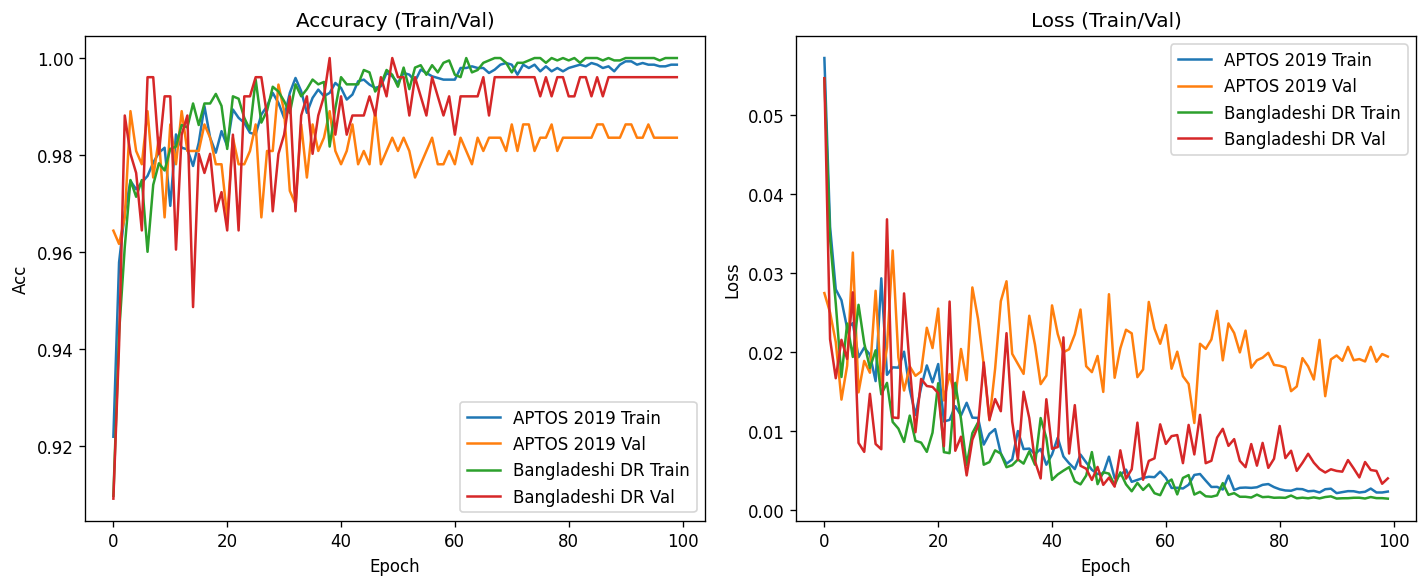

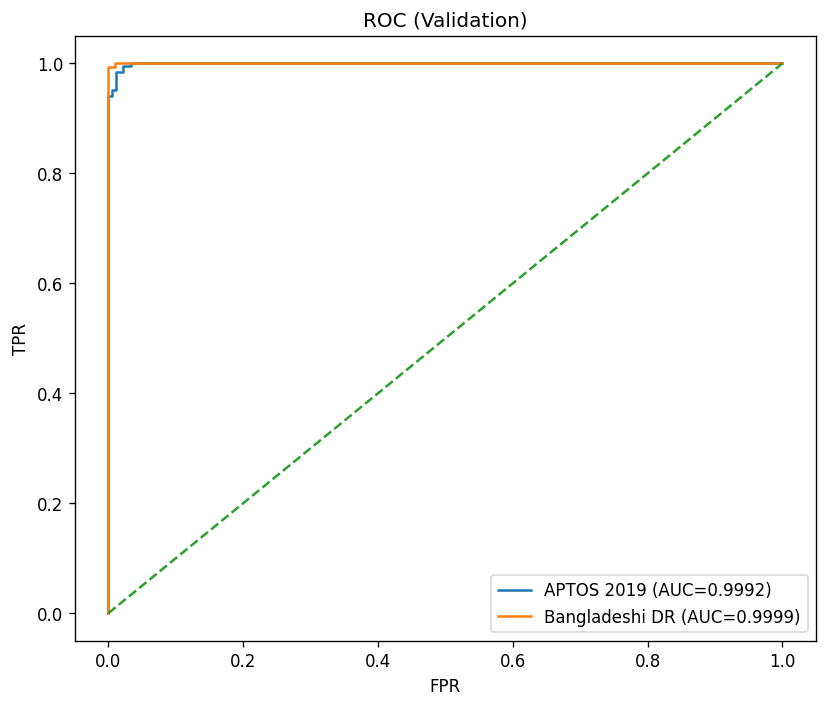

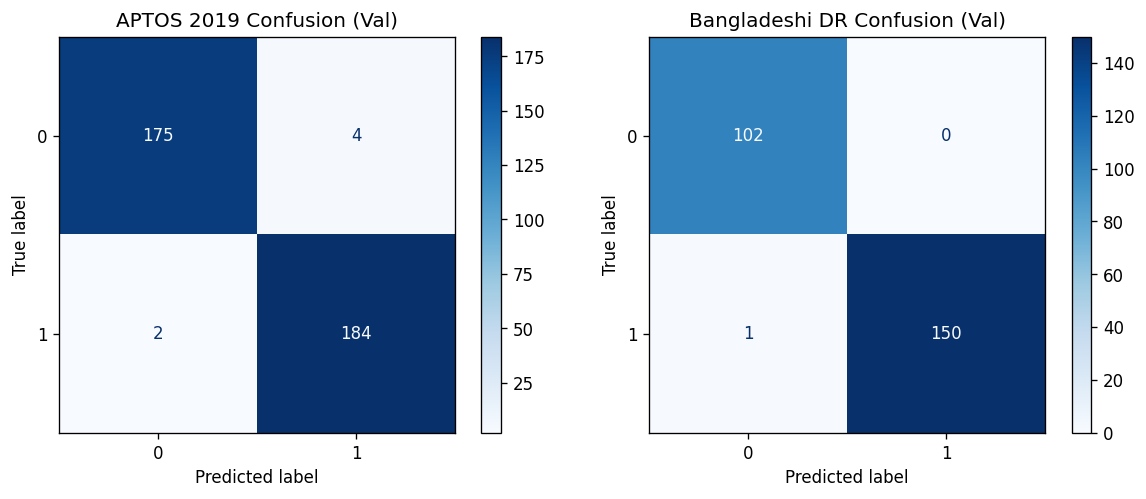


====== Classification Report — APTOS 2019 (Val) ======
              precision    recall  f1-score   support

  Healthy(0)       0.99      0.98      0.98       179
       DR(1)       0.98      0.99      0.98       186

    accuracy                           0.98       365
   macro avg       0.98      0.98      0.98       365
weighted avg       0.98      0.98      0.98       365


====== Classification Report — Bangladeshi DR (Val) ======
              precision    recall  f1-score   support

  Healthy(0)       0.99      1.00      1.00       102
       DR(1)       1.00      0.99      1.00       151

    accuracy                           1.00       253
   macro avg       1.00      1.00      1.00       253
weighted avg       1.00      1.00      1.00       253



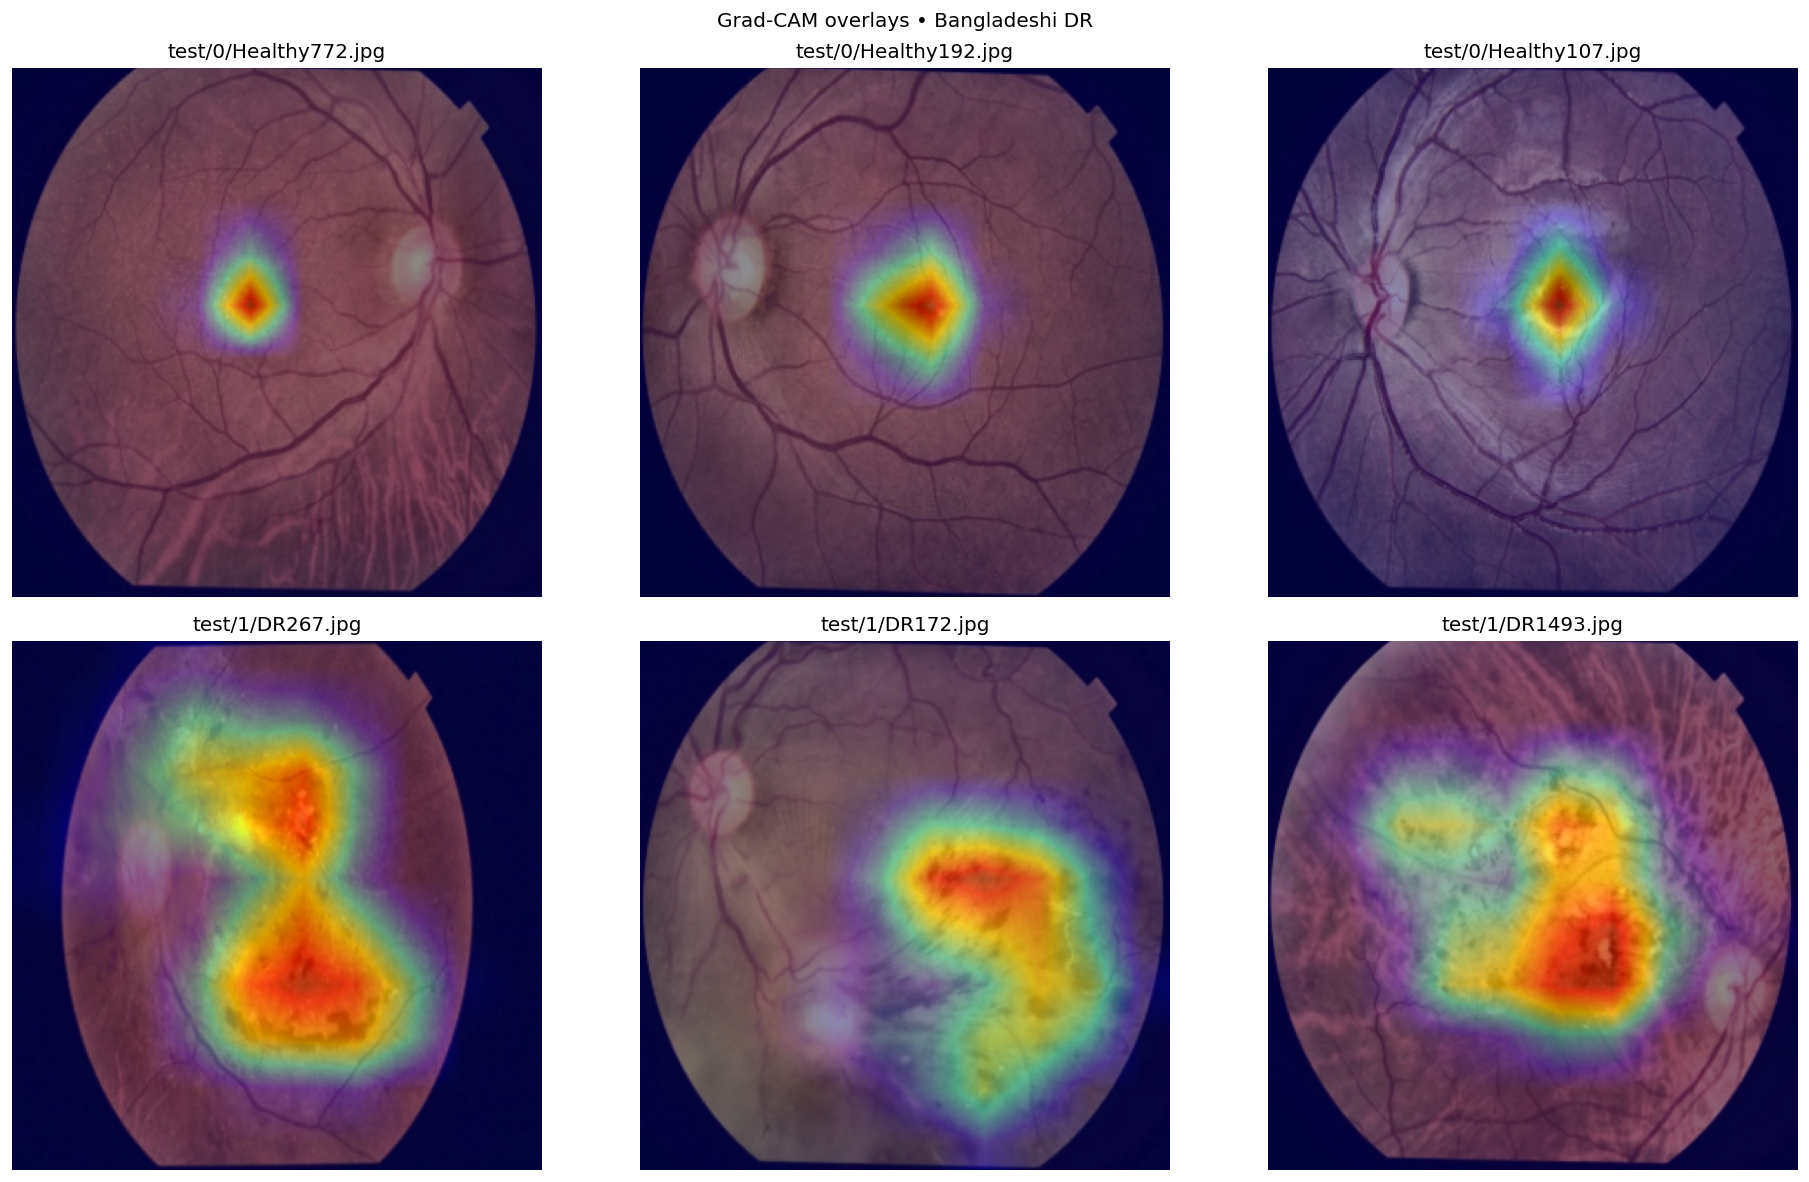

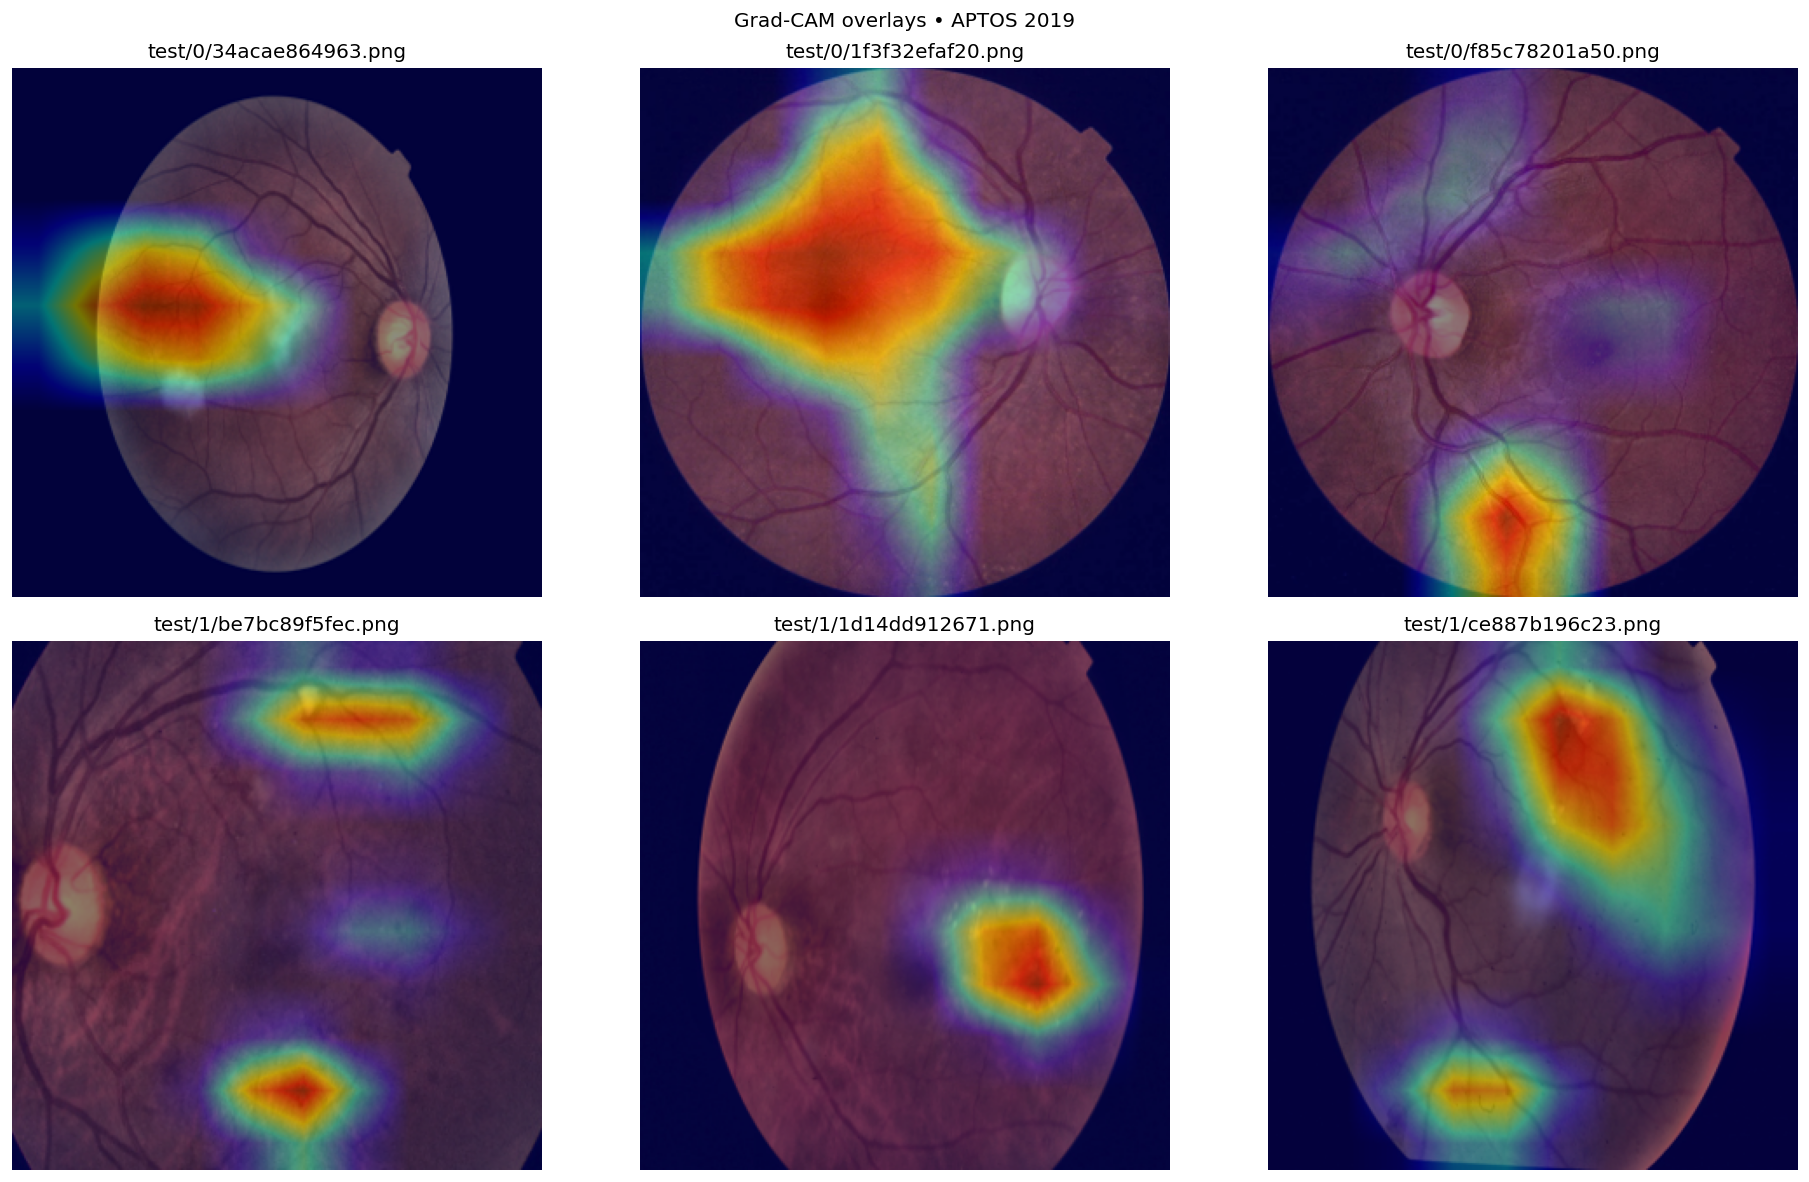

In [19]:
import sys, subprocess
def _maybe_pip(pkg):
    try: __import__(pkg)
    except Exception: subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", pkg])
_maybe_pip("timm")
_maybe_pip("tqdm")
_maybe_pip("scikit-learn")
_maybe_pip("opencv-python")

# --- std libs ---
import os, glob, time, random, math
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

# --- torch / tv ---
import torch, torch.nn as nn, torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms as T, models
from torchvision.datasets.folder import default_loader
import timm

# AMP (CUDA only)
from torch.cuda.amp import autocast, GradScaler

# --- metrics ---
from sklearn.metrics import (
    confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, classification_report
)

# --- PIL safety (truncated imgs) ---
import PIL, PIL.ImageFile
PIL.ImageFile.LOAD_TRUNCATED_IMAGES = True

import cv2

plt.rcParams["figure.dpi"] = 120

# ---------- DEVICE ----------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
if device.type == "cuda":
    print("GPU:", torch.cuda.get_device_name(0))
    print("Memory Allocated:", torch.cuda.memory_allocated(0) / 1024**2, "MB")
    print("Memory Cached:   ", torch.cuda.memory_reserved(0) / 1024**2, "MB")

# ---------- CONFIG ----------
APTOS_ROOT = r"F:\Thessis\data-set\Aptos_1\aptos_split"          # root/{train,val,test}/{0,1}
BD_ROOT    = r"F:\Thessis\data-set\Bangladeshi_Dataset\bd_split" # root/{train,val,test}/{0,1}

IMG_SIZE           = 304            # ViT patch=16 friendly (was 299)
BATCH_SIZE         = 8
ACCUM_STEPS        = 1
EPOCHS             = 100
LR                 = 1e-4
NUM_WORKERS        = 0              # Windows/VSCode stable; পরে 2/4 করতে পারেন
PIN_MEMORY         = torch.cuda.is_available()
FREEZE_BACKBONES   = False
USE_AMP            = torch.cuda.is_available()  # CUDA থাকলে শুধু AMP অন
LABEL_SMOOTHING    = 0.05
SEED               = 42
GRADCAM_SAMPLES    = 6

# ---------- utils ----------
def set_seed(seed=42):
    random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
    if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)
set_seed(SEED)

def ensure_dir(d): os.makedirs(d, exist_ok=True)

# ---------- দ্রুত ডেটা পাথ যাচাই ----------
def sanity_check_roots():
    ok = True
    for root in [APTOS_ROOT, BD_ROOT]:
        print(f"\n[Path Check] {root}")
        for split in ["train", "val", "test"]:
            for cls in ["0","1"]:
                d = os.path.join(root, split, cls)
                exists = os.path.isdir(d)
                cnt = len(glob.glob(os.path.join(d, "*"))) if exists else 0
                print(f"{d}  -> exists={exists}, count={cnt}")
                if not (exists and cnt>0):
                    ok = False
    if not ok:
        raise AssertionError("One or more dataset folders are missing or empty. Fix paths before training.")

sanity_check_roots()

# ---------- Data ----------
class SafeFolder(Dataset):
    def __init__(self, root, transform=None):
        self.transform = transform
        self.samples = []
        for cls in ["0", "1"]:
            d = os.path.join(root, cls)
            if not os.path.isdir(d):
                continue
            for p in glob.glob(os.path.join(d, "*")):
                self.samples.append((p, int(cls)))
        if not self.samples:
            raise RuntimeError(f"No images under {root}")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        attempts = 0
        while attempts < len(self.samples):
            p, y = self.samples[idx]
            try:
                img = default_loader(p)
                if self.transform:
                    img = self.transform(img)
                return img, y, p
            except Exception:
                print(f"Warning: cannot load {p}, skipping")
                idx = (idx + 1) % len(self.samples)
                attempts += 1
        raise RuntimeError("No valid images found in dataset")

def make_loaders(root):
    tf_train = T.Compose([
        T.Resize(int(IMG_SIZE * 1.15)),
        T.RandomResizedCrop(IMG_SIZE, scale=(0.9, 1.0)),
        T.RandomHorizontalFlip(),
        T.RandomVerticalFlip(),
        T.RandomRotation(15),
        T.ColorJitter(0.2, 0.2, 0.1, 0.05),
        T.ToTensor(),
        T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]),
    ])
    tf_eval = T.Compose([
        T.Resize(int(IMG_SIZE * 1.15)),
        T.CenterCrop(IMG_SIZE),
        T.ToTensor(),
        T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]),
    ])
    train_ds = SafeFolder(os.path.join(root,"train"), tf_train)
    val_ds   = SafeFolder(os.path.join(root,"val"),   tf_eval)
    test_ds  = SafeFolder(os.path.join(root,"test"),  tf_eval)

    train_ld = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,  num_workers=NUM_WORKERS, pin_memory=PIN_MEMORY)
    val_ld   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS, pin_memory=PIN_MEMORY)
    test_ld  = DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS, pin_memory=PIN_MEMORY)
    return train_ds, val_ds, test_ds, train_ld, val_ld, test_ld

def calc_alpha_from_train(train_ds):
    labels = [y for _, y in train_ds.samples]
    counts = np.bincount(labels, minlength=2)
    n0, n1 = int(counts[0]), int(counts[1])
    alpha = (n0 + n1) / (2.0 * max(n0, n1) if max(n0, n1) else 1.0)
    return float(alpha), (n0, n1)

# ---------- Focal BCE (binary, single-logit) ----------
class FocalBCELoss(nn.Module):
    def __init__(self, alpha=1.0, gamma=2.0, label_smoothing=0.0):
        super().__init__()
        self.alpha = float(alpha); self.gamma = float(gamma); self.ls = float(label_smoothing)
    def forward(self, logits, targets):
        targets = targets.float()
        if self.ls > 0:
            targets = targets*(1-self.ls) + 0.5*self.ls  # smooth towards 0.5
        bce = F.binary_cross_entropy_with_logits(logits, targets, reduction='none')
        pt = torch.exp(-bce)
        loss = self.alpha * (1-pt)**self.gamma * bce
        return loss.mean()

# ---------- Hybrid Model (binary: single logit) ----------
class HybridModel(nn.Module):
    def __init__(self, freeze_backbones=False):
        super().__init__()
        # ResNet18
        try:
            resnet = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        except Exception:
            resnet = models.resnet18(pretrained=False)  # no download fallback
        resnet.fc = nn.Identity(); res_dim = 512

        # InceptionV3
        try:
            inception = models.inception_v3(weights=models.Inception_V3_Weights.IMAGENET1K_V1)
        except Exception:
            inception = models.inception_v3(pretrained=False)  # no download fallback
        inception.aux_logits = False
        inception.fc = nn.Identity(); inc_dim = 2048

        # ViT-Tiny (feature extractor @ IMG_SIZE)
        try:
            vit = timm.create_model("vit_tiny_patch16_224", pretrained=True, num_classes=0, img_size=IMG_SIZE)
        except Exception:
            vit = timm.create_model("vit_tiny_patch16_224", pretrained=False, num_classes=0, img_size=IMG_SIZE)
        vit_dim = vit.num_features

        self.resnet, self.inception, self.vit = resnet, inception, vit

        if freeze_backbones:
            for m in [self.resnet, self.inception, self.vit]:
                for p in m.parameters(): p.requires_grad = False

        self.head = nn.Sequential(
            nn.Linear(res_dim + inc_dim + vit_dim, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.35),
            nn.Linear(512, 1),   # single logit
        )

    def forward(self, x):
        r = self.resnet(x); i = self.inception(x); v = self.vit(x)
        z = torch.cat([r,i,v], dim=1)
        logit = self.head(z).squeeze(1)
        return logit

# ---------- Quick accuracy ----------
def bin_accuracy_from_logits(logits, targets, thr=0.5):
    preds = (torch.sigmoid(logits) >= thr).long()
    return (preds == targets).float().mean().item()

# ---------- Train ONE dataset ----------
def train_one_dataset(root, name="Dataset"):
    # data + sanity print
    train_ds, val_ds, test_ds, train_ld, val_ld, test_ld = make_loaders(root)
    xb, yb, _ = next(iter(train_ld)); print("Sanity:", xb.shape, yb.shape, "—", name)

    alpha, (n0, n1) = calc_alpha_from_train(train_ds)
    print(f"\n==== {name} ====")
    print(f"Train counts: class 0={n0}, class 1={n1} | Focal α={alpha:.3f}")

    model = HybridModel(FREEZE_BACKBONES).to(device)
    criterion = FocalBCELoss(alpha=alpha, gamma=2.0, label_smoothing=LABEL_SMOOTHING)
    optimizer = torch.optim.Adam([p for p in model.parameters() if p.requires_grad], lr=LR)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)

    scaler = GradScaler(enabled=USE_AMP)

    hist = {"train_acc":[], "val_acc":[], "train_loss":[], "val_loss":[], "lr":[]}
    best_val = -1.0
    ensure_dir("checkpoints")
    ckpt = os.path.join("checkpoints", "best_aptos.pt" if "aptos" in root.lower() else "best_bd.pt")

    for ep in range(1, EPOCHS+1):
        t0 = time.perf_counter()
        # ---- Train ----
        model.train(); tloss=0.0; tcorrect=0; ttotal=0
        optimizer.zero_grad(set_to_none=True)

        for b,(x,y,_) in enumerate(tqdm(train_ld, leave=False, desc=f"[{name}] ep{ep}/{EPOCHS}"), 1):
            x,y = x.to(device), y.to(device)
            with autocast(enabled=USE_AMP):  # fixed
                logits = model(x)
                loss = criterion(logits, y)/ACCUM_STEPS
            scaler.scale(loss).backward()
            if b % ACCUM_STEPS == 0:
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad(set_to_none=True)

            tloss += loss.item() * x.size(0) * ACCUM_STEPS
            tcorrect += (torch.sigmoid(logits).round().long()==y).sum().item()
            ttotal += y.size(0)

        train_loss = tloss/max(ttotal,1); train_acc = tcorrect/max(ttotal,1)

        # ---- Validate ----
        model.eval(); vloss=0.0; vcorrect=0; vtotal=0
        y_true_val=[]; y_pred_val=[]; y_prob_val=[]; val_paths=[]
        with torch.no_grad():
            for x,y,paths in val_ld:
                x,y = x.to(device), y.to(device)
                with autocast(enabled=USE_AMP):  # fixed
                    logits = model(x)
                    loss = criterion(logits, y)
                    probs = torch.sigmoid(logits)
                vloss += loss.item() * x.size(0)
                vcorrect += (probs.round().long()==y).sum().item()
                vtotal += y.size(0)
                y_true_val.extend(y.cpu().numpy())
                y_pred_val.extend(probs.round().cpu().numpy().astype(int))
                y_prob_val.extend(probs.cpu().numpy())
                val_paths.extend(paths)

        val_loss = vloss/max(vtotal,1); val_acc=vcorrect/max(vtotal,1)
        scheduler.step()
        hist["train_loss"].append(train_loss); hist["val_loss"].append(val_loss)
        hist["train_acc"].append(train_acc);   hist["val_acc"].append(val_acc)
        hist["lr"].append(optimizer.param_groups[0]["lr"])
        if val_acc>best_val:
            best_val=val_acc
            torch.save({"state_dict":model.state_dict(),"val_acc":best_val}, ckpt)
            print(f"💾 Saved best → {ckpt}")
        dt=time.perf_counter()-t0
        print(f"epoch {ep}: "
              f"TrainLoss {train_loss:.4f} | TrainAcc {train_acc:.4f} | "
              f"ValLoss {val_loss:.4f} | ValAcc {val_acc:.4f} | Time {dt:.1f}s")

    # final val arrays
    y_true_val=np.array(y_true_val); y_pred_val=np.array(y_pred_val); y_prob_val=np.array(y_prob_val)

    # test accuracy (best ckpt)
    try:
        state=torch.load(ckpt, map_location=device); model.load_state_dict(state["state_dict"])
        print("Loaded best ckpt for test.")
    except Exception as e:
        print("Using last weights for test:", e)
    model.eval()
    test_correct=0; test_total=0
    with torch.no_grad():
        for x,y,_ in test_ld:
            x,y=x.to(device), y.to(device)
            with autocast(enabled=USE_AMP):  # fixed
                probs = torch.sigmoid(model(x))
            test_correct += (probs.round().long()==y).sum().item()
            test_total += y.size(0)
    test_acc = test_correct/max(test_total,1)
    print(f"📦 {name} Test Accuracy: {test_acc:.4f}")

    return {
        "name":name,
        "history":hist,
        "val_true":y_true_val,
        "val_pred":y_pred_val,
        "val_prob":y_prob_val,
        "val_paths":val_paths,
        "test_loader":test_ld,
        "model":model,
        "root":root
    }

# ---------- Combined visuals (curves, ROC, CM, reports) ----------
def compare_visuals(resA, resB):
    nameA, nameB = resA["name"], resB["name"]
    H_A, H_B = resA["history"], resB["history"]

    # Curves
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(H_A["train_acc"], label=f"{nameA} Train")
    plt.plot(H_A["val_acc"],   label=f"{nameA} Val")
    plt.plot(H_B["train_acc"], label=f"{nameB} Train")
    plt.plot(H_B["val_acc"],   label=f"{nameB} Val")
    plt.title("Accuracy (Train/Val)"); plt.xlabel("Epoch"); plt.ylabel("Acc"); plt.legend()

    plt.subplot(1,2,2)
    plt.plot(H_A["train_loss"], label=f"{nameA} Train")
    plt.plot(H_A["val_loss"],   label=f"{nameA} Val")
    plt.plot(H_B["train_loss"], label=f"{nameB} Train")
    plt.plot(H_B["val_loss"],   label=f"{nameB} Val")
    plt.title("Loss (Train/Val)"); plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()
    plt.tight_layout(); plt.show()

    # ROC
    fprA, tprA, _ = roc_curve(resA["val_true"], resA["val_prob"]); aucA = auc(fprA, tprA)
    fprB, tprB, _ = roc_curve(resB["val_true"], resB["val_prob"]); aucB = auc(fprB, tprB)
    plt.figure(figsize=(7,6))
    plt.plot(fprA,tprA,label=f"{nameA} (AUC={aucA:.4f})")
    plt.plot(fprB,tprB,label=f"{nameB} (AUC={aucB:.4f})")
    plt.plot([0,1],[0,1],'--')
    plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC (Validation)")
    plt.legend(loc="lower right"); plt.tight_layout(); plt.show()

    # Confusion Matrices
    cmA = confusion_matrix(resA["val_true"], resA["val_pred"], labels=[0,1])
    cmB = confusion_matrix(resB["val_true"], resB["val_pred"], labels=[0,1])
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    ConfusionMatrixDisplay(cmA, display_labels=[0,1]).plot(ax=ax[0], cmap=plt.cm.Blues, values_format="d")
    ax[0].set_title(f"{nameA} Confusion (Val)")
    ConfusionMatrixDisplay(cmB, display_labels=[0,1]).plot(ax=ax[1], cmap=plt.cm.Blues, values_format="d")
    ax[1].set_title(f"{nameB} Confusion (Val)")
    plt.tight_layout(); plt.show()

    # Classification reports (text)
    print(f"\n====== Classification Report — {nameA} (Val) ======")
    print(classification_report(resA["val_true"], resA["val_pred"], target_names=["Healthy(0)","DR(1)"]))
    print(f"\n====== Classification Report — {nameB} (Val) ======")
    print(classification_report(resB["val_true"], resB["val_pred"], target_names=["Healthy(0)","DR(1)"]))

# ---------- Grad-CAM ----------
class GradCAM:
    def __init__(self, model: nn.Module, target_layer: nn.Module):
        self.model = model
        self.tlayer = target_layer
        self.grads = None; self.acts = None
        self.fh = self.tlayer.register_forward_hook(self._fwd)
        self.bh = self.tlayer.register_full_backward_hook(self._bwd)
    def _fwd(self, m, i, o): self.acts = o
    def _bwd(self, m, gi, go): self.grads = go[0]
    def __call__(self, x):
        self.model.zero_grad(set_to_none=True)
        logits = self.model(x)
        score = torch.sigmoid(logits).mean()
        score.backward(retain_graph=True)
        w = self.grads.mean(dim=(2,3), keepdim=True)
        cam = (self.acts * w).sum(dim=1, keepdim=True)
        cam = F.relu(cam)
        cam = F.interpolate(cam, x.shape[2:], mode="bilinear", align_corners=False)
        cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)
        return cam.detach().cpu()
    def close(self):
        self.fh.remove(); self.bh.remove()

def denorm_img(x3hw):
    mean=np.array([0.485,0.456,0.406],dtype=np.float32)
    std =np.array([0.229,0.224,0.225],dtype=np.float32)
    img=x3hw.detach().cpu().numpy().transpose(1,2,0)
    img=img*std+mean
    return np.clip(img,0,1)

def show_cam_overlay(img_tensor, cam, alpha=0.5, cmap="jet"):
    plt.imshow(denorm_img(img_tensor))
    plt.imshow(cam.squeeze().numpy(), alpha=alpha, cmap=cmap)
    plt.axis("off")

def gradcam_grid_balanced(res, title="Dataset", k_each=3, alpha=0.45,
                          figsize=(16,10), save_path=None):
    """
    Draw a 2x3 grid of Grad‑CAM overlays with filenames in titles,
    balanced: k_each from test/0 and test/1.
    """
    model = res["model"].eval()
    root  = res["root"]
    img_size = IMG_SIZE

    # pick a robust conv layer for CAM
    target_layer = model.resnet.layer4[-1].conv2
    cam_engine = GradCAM(model, target_layer)

    # collect test paths per class
    paths0 = sorted(glob.glob(os.path.join(root, "test", "0", "*")))
    paths1 = sorted(glob.glob(os.path.join(root, "test", "1", "*")))
    pick0  = random.sample(paths0, min(k_each, len(paths0)))
    pick1  = random.sample(paths1, min(k_each, len(paths1)))
    picks  = pick0 + pick1

    # eval transform
    tfm = T.Compose([
        T.Resize((img_size, img_size)),
        T.ToTensor(),
        T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]),
    ])

    # plot 2x3 grid
    plt.figure(figsize=figsize)
    for i, pth in enumerate(picks[:6], 1):
        pil_img = default_loader(pth)
        img_rgb = np.array(pil_img.resize((img_size, img_size)))

        x = tfm(pil_img).unsqueeze(0).to(device)
        x.requires_grad_(True)

        with torch.enable_grad():
            cam = cam_engine(x).squeeze().cpu().numpy()  # [H,W] in [0,1]

        heat = cv2.applyColorMap(np.uint8(255*cam), cv2.COLORMAP_JET)
        heat = cv2.cvtColor(heat, cv2.COLOR_BGR2RGB)
        overlay = np.clip((1 - alpha) * img_rgb + alpha * heat, 0, 255).astype(np.uint8)

        plt.subplot(2, 3, i)
        plt.imshow(overlay); plt.axis("off")
        rel = "/".join(pth.split(os.sep)[-3:])  # e.g., test/0/Healthy219.jpg
        plt.title(rel)

    cam_engine.close()
    plt.suptitle(f"Grad-CAM overlays • {title}")
    plt.tight_layout()
    if save_path:
        ensure_dir(os.path.dirname(save_path))
        plt.savefig(save_path, bbox_inches="tight", dpi=200)
    plt.show()

# ================= MAIN =================
if __name__ == "__main__":
    # Train both datasets
    res_aptos = train_one_dataset(APTOS_ROOT, "APTOS 2019")
    res_bd    = train_one_dataset(BD_ROOT,    "Bangladeshi DR")

    # Combined visuals & reports
    compare_visuals(res_aptos, res_bd)

    # Grad-CAM grids
    gradcam_grid_balanced(res_bd, title="Bangladeshi DR",
                          k_each=3, alpha=0.45,
                          save_path="gradcam_outputs/bd/grid_2x3.png")

    gradcam_grid_balanced(res_aptos, title="APTOS 2019",
                          k_each=3, alpha=0.45,
                          save_path="gradcam_outputs/aptos/grid_2x3.png")
